# Grupo de Trabajo

*   Oscar Camilo Alvaréz Torres
*   Julio César Solano
*   Ronaldo Ballesteros Salguero
*   Maria Camila Lenis Restrepo

# Introducción al Machine Learning - Semana 4
## Caso: Implementación de modelos no lineales aditivos en un problema de regresión

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos no lineales aditivos y seleccionar aquel que tenga el mejor desempeño para resolver un problema de regresión. En particular, se deberán implementar modelos MARS y GAM.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios de evaluación

Los criterios que se evaluarán son:  

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos]

Estimación de modelos lineales: Se estiman los tres modelos lineales solicitados, se evalúan en test y se concluye correctamente qué modelo tiene mayor capacidad predictiva. [10 puntos]

Estimación del modelo MARS: Se estima el modelo MARS correctamente [15 puntos]

Interpretación de predictores MARS: Se interpretan al menos tres predictores en el modelo MARS y no se presentan errores en este análisis. [15 puntos]

Estimación del modelo GAM: Se estima el modelo GAM correctamente [10 puntos]

Interpretación de predictores GAM: Se interpretan los mismos predictores que en el modelo MARS y no presenta errores en su análisis. [10 puntos]

Conclusión sobre la primera hipótesis: Se utiliza el procedimiento adecuado para concluir sobre la hipótesis establecida y se realiza el análisis correctamente. [10 puntos]

Conclusión sobre la segunda hipótesis: Se utiliza el procedimiento adecuado para concluir sobre la hipótesis establecida y se realiza el análisis correctamente. [10 puntos]

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [10 puntos]

### Datos

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "Carseats", la cual contiene 10 variables predictivas. De esta manera, el objetivo de la actividad es predecir la variable de ventas "Sales".

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://r-data.pmagunia.com/dataset/r-dataset-package-islr-carseats


![EX20MDT3GPA%20%201440%20X%20120@96x-100.jpg](attachment:EX20MDT3GPA%20%201440%20X%20120@96x-100.jpg)

### 1. Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (matriz de correlación, gráficos de dispersión, histogramas y estadísticas descriptivas).

In [ ]:
!pip install pygam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 8.4 MB/s eta 0:00:00


In [7]:
# Librerias
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from pygam import GAM, s, LinearGAM, te, f, l
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
#from pyearth import Earth    # No funciona en Colab

In [8]:
# Entrada de datos
ruta_archivo = "/content/Carseats.csv"
df = pd.read_csv(ruta_archivo)
datos = df.drop(df.columns[0], axis=1)

In [4]:
# Valores ausentes
datos.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
# Validación carga de datos
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


**Visualización y análisis de datos**

**Características**  
*Variables categóricas*: ShelveLoc, Urbano, EE. UU., Educación (A pesar de que el tipo de datos "Education" es un número entero en el conjunto de datos original, no se puede distinguir las diferencias de cada nivel educativo, ya que, tienen el mismo significado numérico.  

*Variables continuas*: CompPrice, Ingresos, Publicidad, Población, Precio, Edad.

**Variable Objetivo**  
Ventas (Sales): con una distribución casi normal, asimetría leve, positiva.

In [ ]:
# Revisión de valores en las variables categóricas
cat_cols = ['Education', 'ShelveLoc', 'Urban', 'US']
for col in cat_cols:
    print(f"Feature Name {col} : \n{datos[col].value_counts()}")

Feature Name Education : 
17    49
12    49
10    48
11    48
16    47
13    43
14    40
18    40
15    36
Name: Education, dtype: int64
Feature Name ShelveLoc : 
Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64
Feature Name Urban : 
Yes    282
No     118
Name: Urban, dtype: int64
Feature Name US : 
Yes    258
No     142
Name: US, dtype: int64


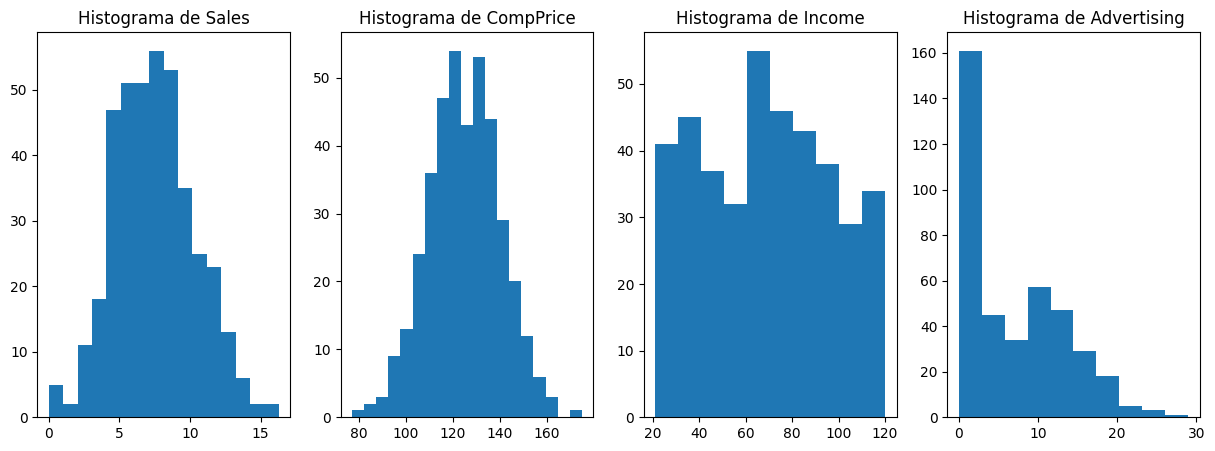

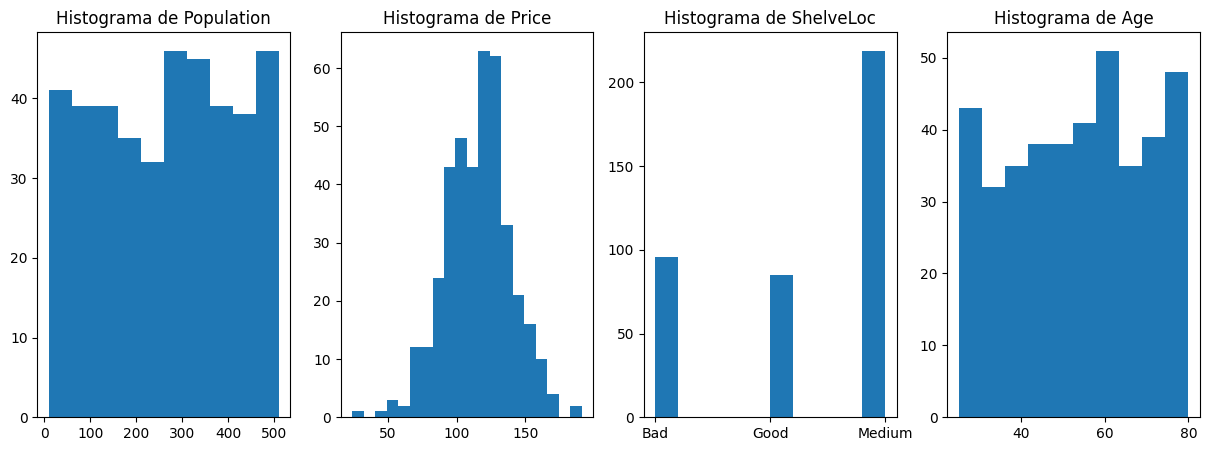

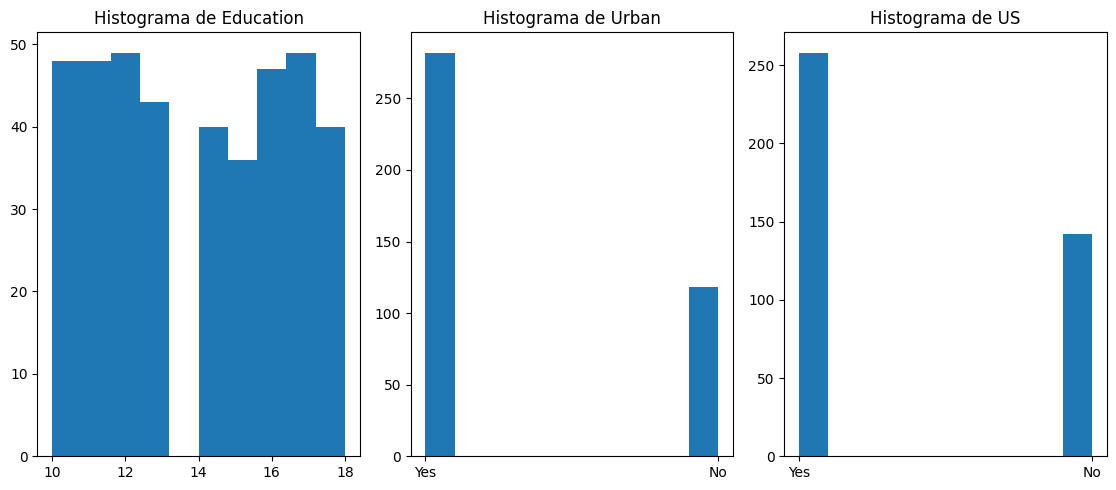

In [9]:
# Histogramas
columnas_a_graficar = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']

graficas_por_fila = 4
fila_actual = 1

# Itera sobre las columnas que deseas graficar
for i, columna in enumerate(columnas_a_graficar):
    if i % graficas_por_fila == 0:
        plt.figure(figsize=(15, 5))
        fila_actual = 1

    # Crea histograma para la columna actual
    plt.subplot(1, graficas_por_fila, fila_actual)
    plt.hist(datos[columna], bins='auto')
    plt.title("Histograma de " + columna)
    fila_actual += 1

plt.tight_layout()
plt.show()

El set de datos corresponde a un conjunto de datos que contiene ventas de sillas de coche para niños en 400 tiendas diferentes.

*   Ventas (Sales): ventas unitarias (en miles) en cada ubicación
*   CompPrice: precio cobrado por el competidor en cada ubicación
*   Ingresos: nivel de ingresos de la comunidad (en miles de dólares)
*   Publicidad: presupuesto de publicidad local de la empresa en cada ubicación (en miles de dólares)
*   Población: tamaño de la población en la región (en miles)
*   Precio: precio que cobra la empresa por los asientos para el automóvil en cada sitio.
*   ShelveLoc: factor con niveles Malo, Bueno y Medio que indica la calidad de la ubicación de las estanterías para los asientos del automóvil en cada sitio.
*   Edad: edad promedio de la población local.
*   Educación: nivel de educación en cada ubicación.
*   Urbano: factor con niveles No y Sí para indicar si la tienda está en una ubicación urbana o rural.
*   EE.UU.: factor con niveles No y Sí para indicar si la tienda está en EE.UU. o no.


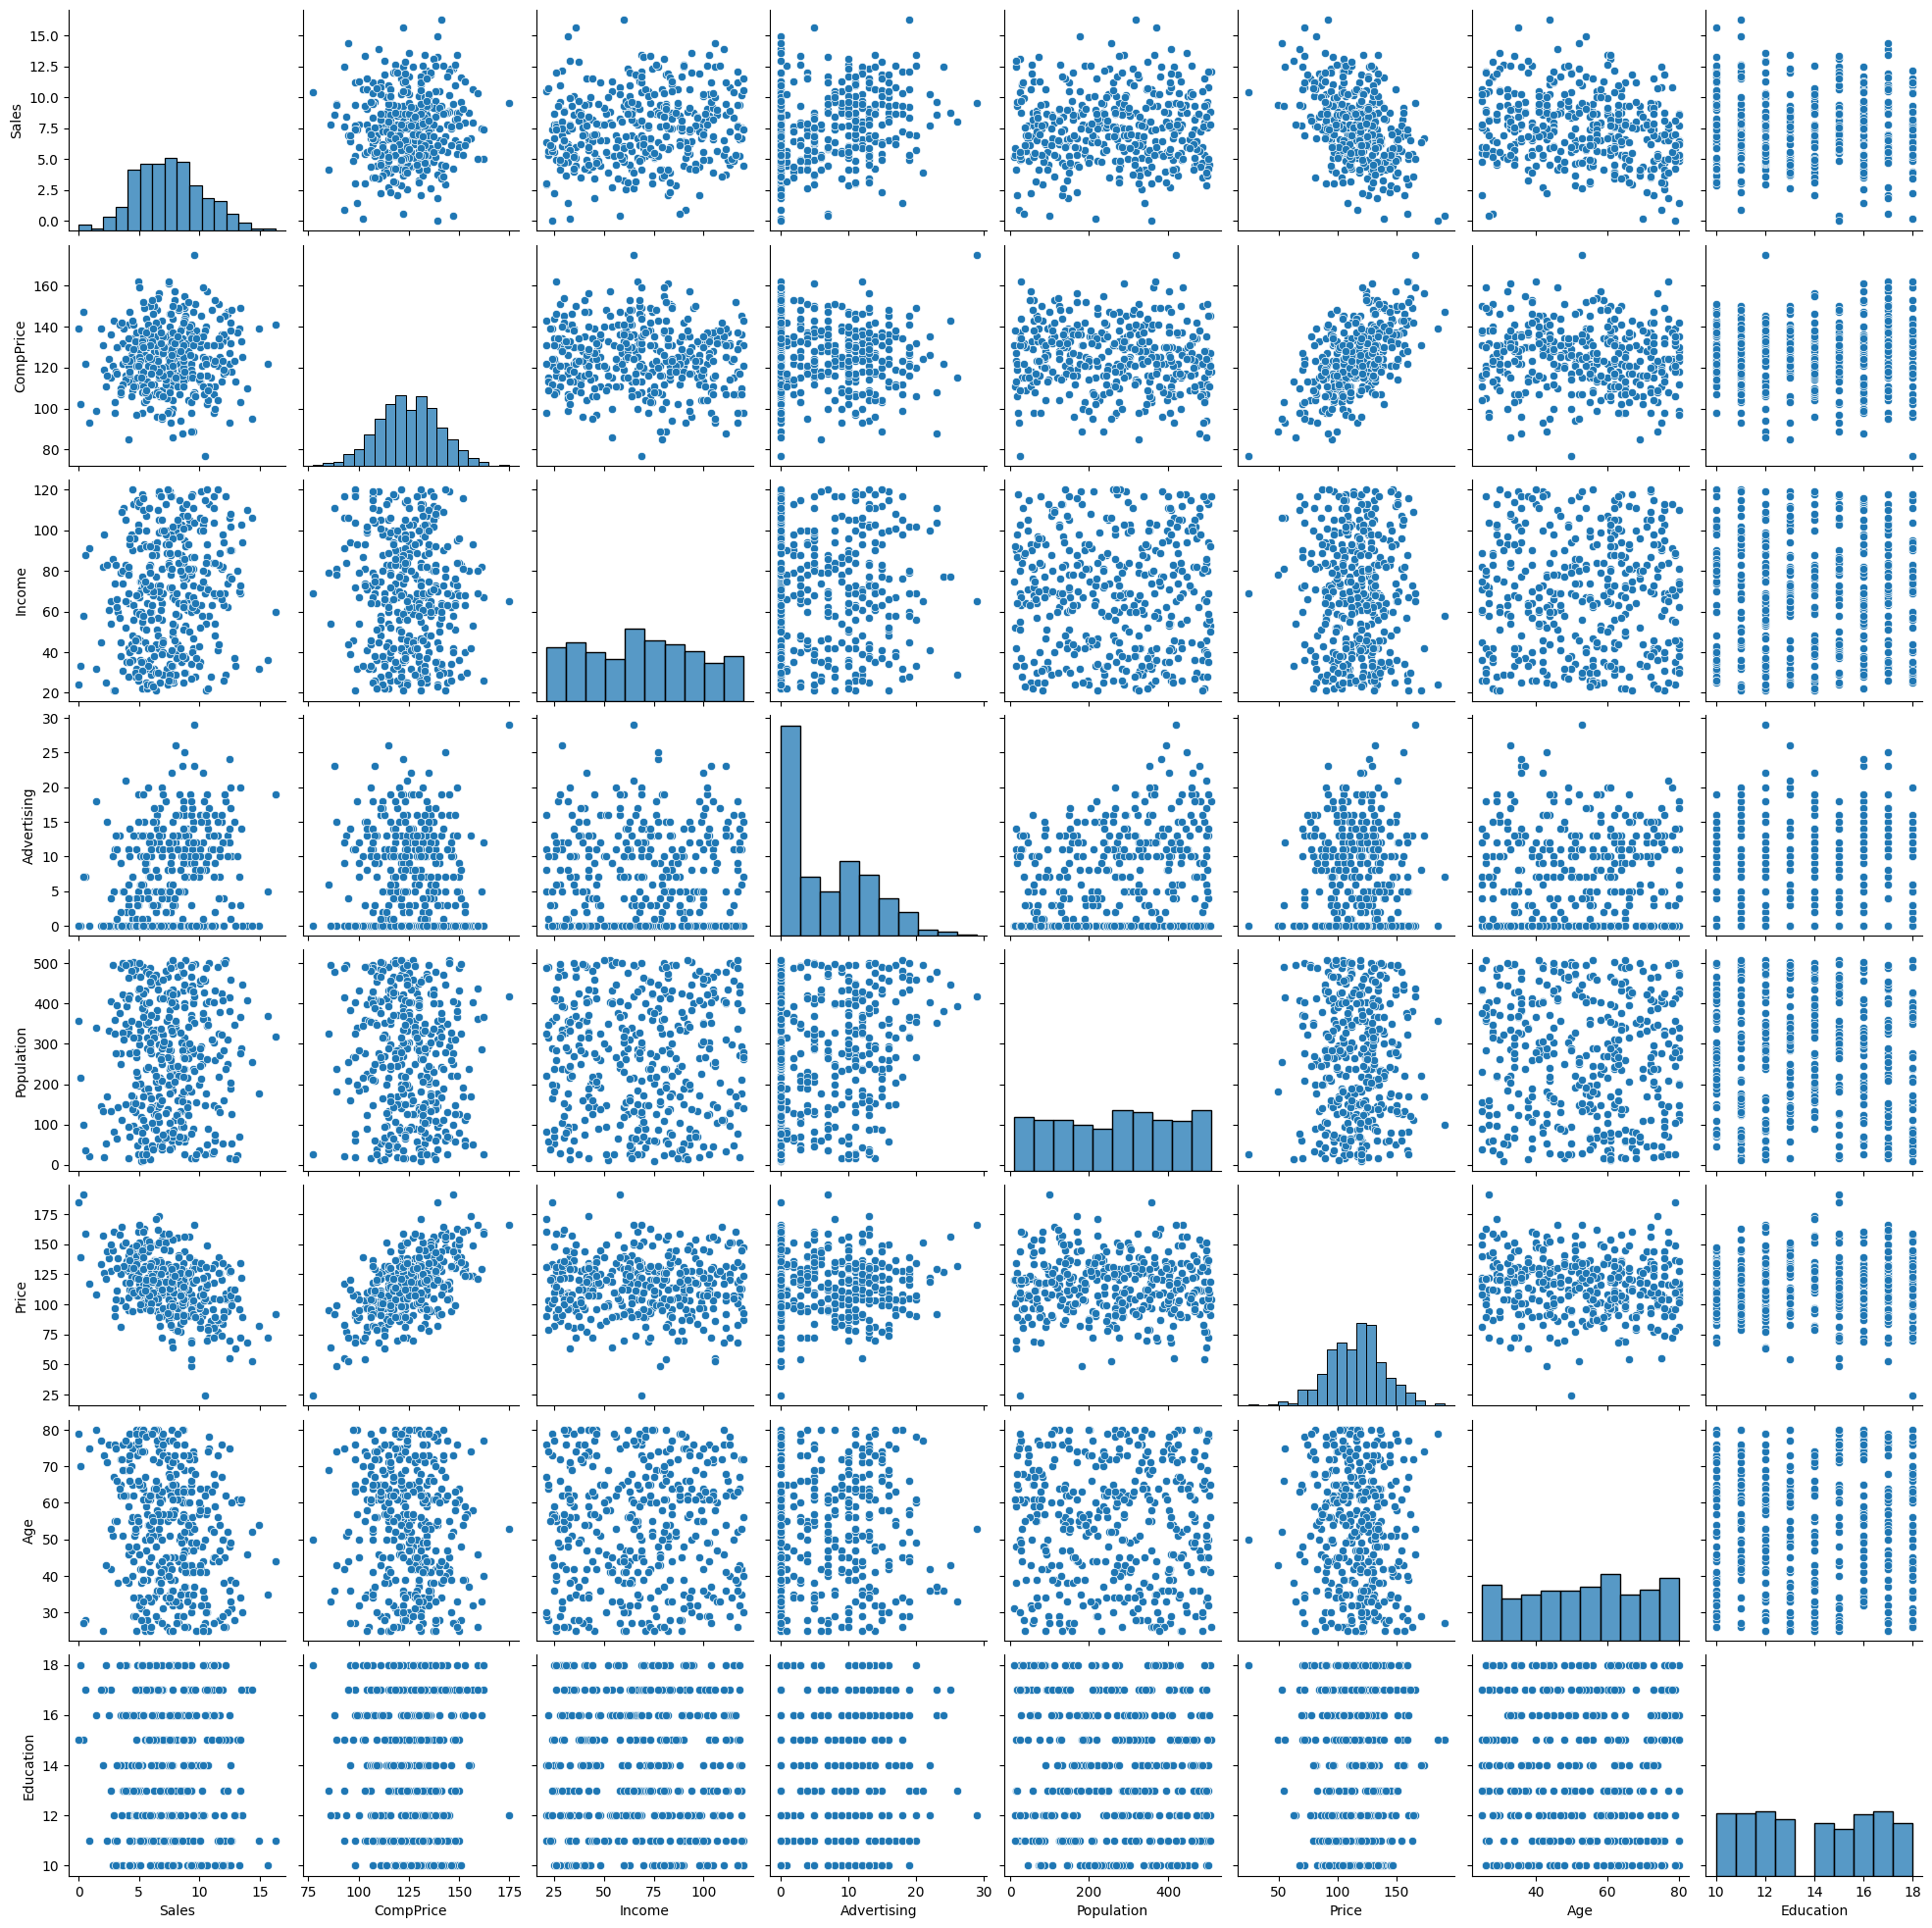

In [ ]:
# Matriz de Correlación
columnas = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']

#Crear el pairplot con solo las columnas seleccionadas
sns.pairplot(datos[columnas], kind="scatter")
plt.show()

<ipython-input-2-ed81d59b6d86>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(datos[variables_correlacionadas].corr(), annot=True, cmap='coolwarm', fmt=".2f")


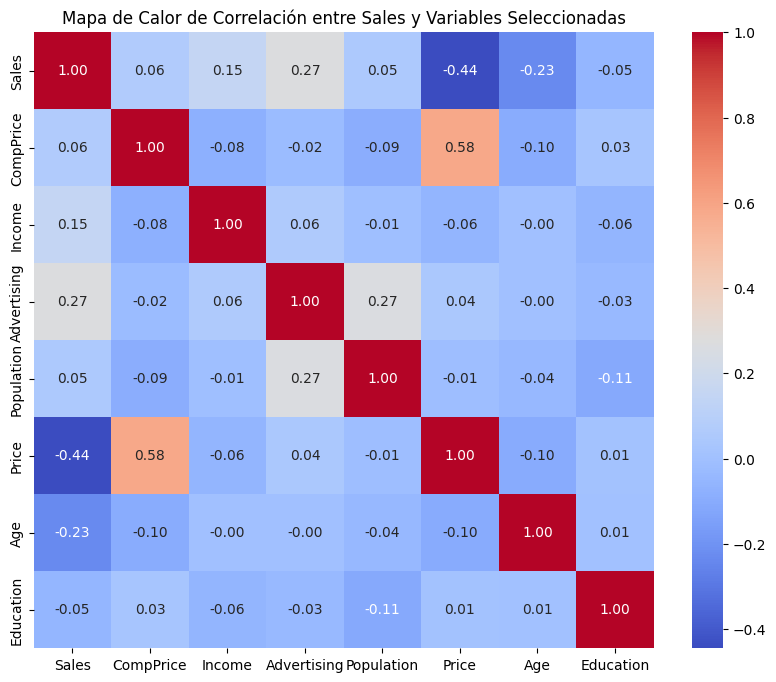

In [ ]:
# Mapa de calor correlaciones
plt.figure(figsize=(10, 8))

# Variables con mayor correlación con 'Salary' basados en tablas anteriores
variables_correlacionadas = ['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'ShelveLoc', 'Age', 'Education', 'Urban', 'US']

# Mapa de calor de las correlaciones
sns.heatmap(datos[variables_correlacionadas].corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Mapa de Calor de Correlación entre Sales y Variables Seleccionadas')
plt.show()

Text(0.5, 1.0, 'Sales vs Price')

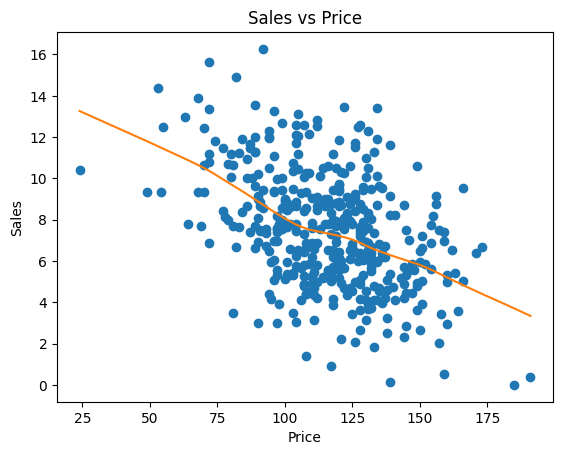

In [10]:
# Gráfico de dispersión Sales vs Price
import statsmodels.api as sm
lowess = sm.nonparametric.lowess # Funciones de suavización para visualización
smooth = lowess(datos['Sales'],datos['Price'])
plt.plot(datos['Price'], datos['Sales'], 'o')
plt.plot(smooth[:,0],smooth[:,1])
plt.xlabel('Price')
plt.ylabel('Sales')
plt.title('Sales vs Price')

In [11]:
datos.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,400.0,7.496325,2.824115,0.0,5.39,7.49,9.32,16.27
CompPrice,400.0,124.975000,15.334512,77.0,115.00,125.00,135.00,175.00
Income,400.0,68.657500,27.986037,21.0,42.75,69.00,91.00,120.00
Advertising,400.0,6.635000,6.650364,0.0,0.00,5.00,12.00,29.00
Population,400.0,264.840000,147.376436,10.0,139.00,272.00,398.50,509.00
Price,400.0,115.795000,23.676664,24.0,100.00,117.00,131.00,191.00
Age,400.0,53.322500,16.200297,25.0,39.75,54.50,66.00,80.00
Education,400.0,13.900000,2.620528,10.0,12.00,14.00,16.00,18.00


In [12]:
# Asimetria de la variable objetivo
datos['Sales'].skew()

0.18556036318721578

Este valor de asimetría positiva es leve, y significa que hay una cola más larga en el lado derecho de la distribución. Sin embargo, dado que el valor es bastante bajo, y basados en el histograma arriba, la distribución de la variable objetivo no se aleja demasiado de una distribución normal. Para los modelos GAM se decide no transformar la variable.

**Estadísticas Descriptivas**

La variable Sales tiene un promedio de aproximadamente 7.4 mil ventas por ubicacion, con una desviación estándar de 2.8 mil ventas. El promedio de precio de venta de las sillas es de 115 dolares y el promedio de venta de la competencia es de 124.9 dolares. La mayoria de tiendas estan en estados unidos.

**Correlaciones**:  

Sales y ComPrice: Correlación muy débil y positiva (0.06).  
Sales e Income: Correlación muy débil y positiva (0.15).  
Sales y Advertising: Correlación débil y positiva (0.27).  
Sales y Population: Correlación muy débil y positiva (0.05).  
Sales y Price: Correlación moderada y negativa (-0.44).  
Sales y Age: Correlación débil y negativa (-0.23).  
Sales y Education: Correlación muy débil y negativa (-0.05).  
Otras correlaciones notables entre las variables independientes incluyen:  

CompPrice y Price: Correlación moderada y positiva (0.58), lo que sugiere que cuando el precio de la competencia es alto, el precio del producto tiende a ser también alto.  
Advertising y Population: Correlación débil y positiva (0.27), posiblemente indicando que hay más publicidad en áreas con mayor población.  

La variable que tiene una correlacion mas fuerte con la variable de ventas es Price, lo cual indica que ha medida que los precios de las sillas bajan, se venden mas unidades.

En los histogramas no observamos valores atípicos. Las variables de Sales, ComPrice y Price tienen una dsitrinucion simetrica en relación a la distribución de los datos. La variable Advertisign tiene una distribución asimétrica a la izquierda.  


In [20]:
# Transformacion de datos

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Transformacion variables dummy

#A plicar One-Hot Encoding a la columna 'ShelveLoc'
df_encoded = pd.get_dummies(datos, columns=['ShelveLoc'])
#Ajuste variables Urban y US a valores numericos
mapeo = {"Yes": 1, "No": 0}
df_encoded["Urban"] = df_encoded["Urban"].map(mapeo)
df_encoded["US"] = df_encoded["US"].map(mapeo)

# 2. Limpieza y estandarizacion

# Lista de columnas que se estandarizarán
columnas_a_estandarizar = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
                           'Age', 'Education']

# Lista de columnas que no se estandarizarán (variables Dummy)
columnas_sin_estandarizar = ['Urban', 'US', 'ShelveLoc_Bad', 'ShelveLoc_Good', 'ShelveLoc_Medium']

# Separar las variables seleccionadas para estandarización y las que no
X_estandarizar = df_encoded[columnas_a_estandarizar].to_numpy()
X_sin_estandarizar = df_encoded[columnas_sin_estandarizar].to_numpy()
y = df_encoded['Sales'].to_numpy()

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
XTrain_estandarizar, XTest_estandarizar, XTrain_sin_estandarizar, XTest_sin_estandarizar,yTrain, yTest = train_test_split(X_estandarizar, X_sin_estandarizar, y, test_size=0.33, random_state=0)

# Estándarizar solo las variables seleccionadas
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(XTrain_estandarizar)
XTrain_estandarizado = scaler.transform(XTrain_estandarizar)
XTest_estandarizado = scaler.transform(XTest_estandarizar)

# Concatenar las variables estandarizadas con las no estandarizadas

XTrain = np.concatenate((XTrain_estandarizado, XTrain_sin_estandarizar), axis=1)
XTest = np.concatenate((XTest_estandarizado, XTest_sin_estandarizar), axis=1)



##########BORRAR - DATOS DE PRUEBA SIN ESTANDARIZAR

#columnas_a_convertir = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
#       'Age', 'Education', 'Urban', 'US', 'ShelveLoc_Bad', 'ShelveLoc_Good',
#      'ShelveLoc_Medium']
#XTotal = df_encoded[columnas_a_convertir].to_numpy()
#yTotal = df_encoded['Sales'].to_numpy()


#XTrain, XTest, yTrain, yTest = train_test_split(XTotal, yTotal, test_size=0.33, random_state=0)


### 2. Estimación de Modelos Lineales  (10 puntos)
Encuentren el modelo lineal que mejor predice la variable "Sales" entre Lasso, PCA, PLS. Para esto, estimen los modelos usando la muestra de entrenamiento y evalúen el poder predictivo en la muestra de test. Describan su procedimiento y analicen los resultados.

MODELO LASSO

El parámetro de penalización es:
0.015885651294280528

El valor del R^2 es:
0.8899116321454967

Los coeficientes estimados son:
[ 1.43276168  0.38111108  0.87691012  0.         -2.34001317 -0.73950528
 -0.1519832   0.         -0.14848161 -1.97754116  2.69650655 -0.        ]


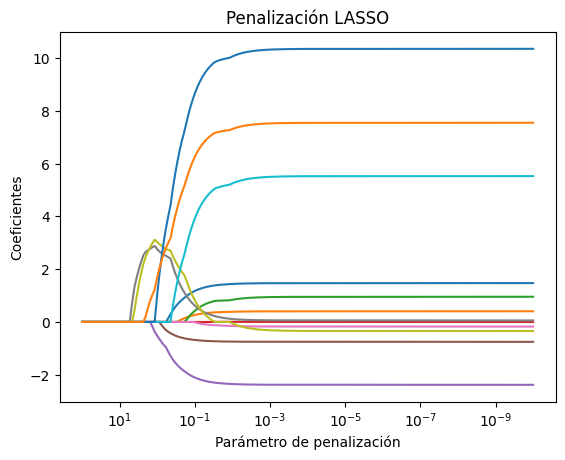


MSE regresión con penalización tipo LASSO:
1.231232467034276


MODELO PCA



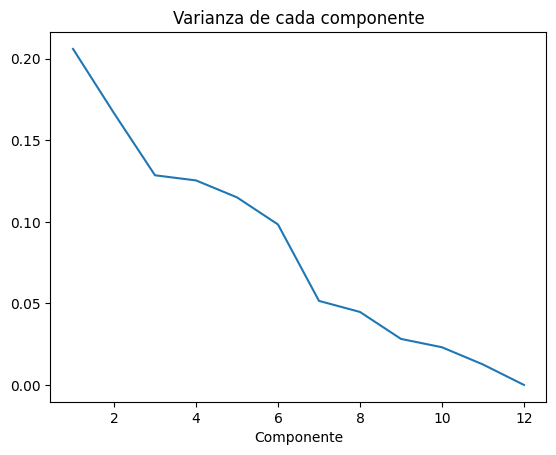

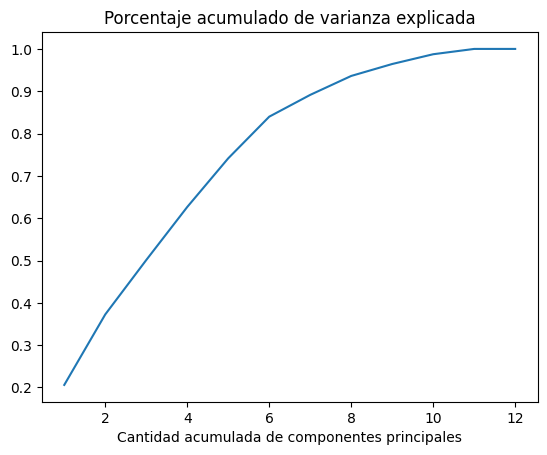


MSE regresión por componentes principales:
3.767791562525517


MODELO PLS

MSE regresión por partial least squares:
1.2663116608786584


COMPARACION MSE MODELOS LASSO, PSA Y PLS



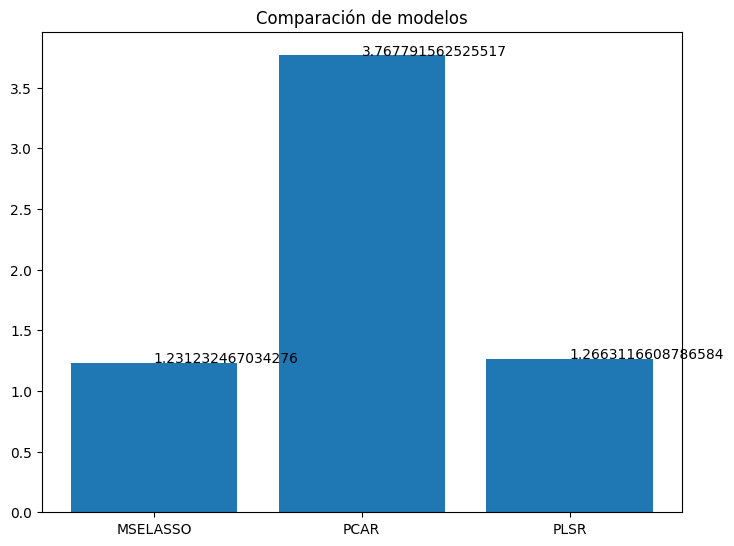

In [33]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

#1. Modelo Lasso
print("\033[1;31mMODELO LASSO\033[0m\n")


n_alphas = 200
alphasCalibrar = np.logspace(-10, 2, n_alphas)
modeloLASSO = LassoCV(alphas=alphasCalibrar).fit(XTrain, yTrain)

print('El parámetro de penalización es:')
print(modeloLASSO.alpha_)
print('\nEl valor del R^2 es:')
print(modeloLASSO.score(XTrain, yTrain))
print('\nLos coeficientes estimados son:')
print(modeloLASSO.coef_)

coefs = []
for a in alphasCalibrar:
    lasso = Lasso(alpha=a, fit_intercept=False,max_iter=10000)
    lasso.fit(XTrain, yTrain)
    coefs.append(lasso.coef_)

# Presentación de resultados

ax = plt.gca()

ax.plot(alphasCalibrar, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('Parámetro de penalización')
plt.ylabel('Coeficientes')
plt.title('Penalización LASSO')
plt.axis('tight')
plt.show()

prediccionLASSO=modeloLASSO.predict(XTest)
MSELASSO=np.average(np.square(prediccionLASSO-yTest))
print('\nMSE regresión con penalización tipo LASSO:')
print(MSELASSO)

#2. MODELO PCA
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

XEscaladoTrain = XTrain

print("\n\n\033[1;31mMODELO PCA\033[0m\n")
#calculo matriz A
p=len(XEscaladoTrain[1,])
pca = PCA(n_components=p).fit(XEscaladoTrain)
A=pca.components_

#Varianza explicada por cada componente
varianzaExplicada=pca.explained_variance_
porcentajeVarianzaExplicada=pca.explained_variance_ratio_
plt.plot(range(1,p+1),porcentajeVarianzaExplicada)
plt.xlabel('Componente')
plt.title('Varianza de cada componente')
plt.show()

print("")
plt.plot(range(1,p+1),np.cumsum(porcentajeVarianzaExplicada))
plt.xlabel('Cantidad acumulada de componentes principales')
plt.title('Porcentaje acumulado de varianza explicada')
plt.show()

# Con las primeras 8 componentes principales ya se está explicando alrededor del 90% de la variabilidad total.
# Cálculo a regresión lineal  con 8 componentes.
nComponentesElegidas=8
ZTotalTrain=np.matmul(XEscaladoTrain,A)
ZTrain = ZTotalTrain[:,range(nComponentesElegidas)]
regPCA = LinearRegression()
regPCA.fit(ZTrain, yTrain)

#  Centrar predictores de la muestra de evaluación con la misma transformación que se utilizó en train
XEscaladoTest = XTest

# Usando la matriz 𝐴 calculada , se transforman las variables y se utilizan únicamente las componentes elegidas (8)
ZTotalTest=np.matmul(XEscaladoTest,A)
ZTest = ZTotalTest[:,range(nComponentesElegidas)]

# Calculo MSE usando el modelo estimado con las variables transformadas
prediccionPCA=regPCA.predict(ZTest)
MSEPCA=np.average(np.square(prediccionPCA-yTest))
print('\nMSE regresión por componentes principales:')
print(MSEPCA)

#3. Modelo PLS
print("\n\n\033[1;31mMODELO PLS\033[0m\n")

from sklearn.cross_decomposition import PLSRegression

pls = PLSRegression(n_components=8)
pls.fit(XTrain, yTrain)

prediccionPLS=pls.predict(XTest)
prediccionPLS=np.hstack(prediccionPLS)
MSEPLS=np.average(np.square(prediccionPLS-yTest))
print('MSE regresión por partial least squares:')
print(MSEPLS)

# Comparación de modelos
print("\n\n\033[1;31mCOMPARACION MSE MODELOS LASSO, PSA Y PLS\033[0m\n")

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['MSELASSO','PCAR', 'PLSR']
ejeY = [MSELASSO,MSEPCA,MSEPLS]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

**Procedimiento**:

Modelo LASSO: Se calibro el modelo con penalización LASSO usando cross-validation. Una vez calibrado el modelo, detrminamos los valores de𝜆, del 𝑅2 y  los coeficientes estimados.  Finalmente ejecutamos las predicciones sobre la muestra de evaluación y calcular el MSE correspondiente a las predicciones del modelo, el cual dio un valor de 1.23.

Modelo PCA: Usando los predictores estandarizados, calcularemos la matriz 𝐴. Una vez se realizo el calculo se  visualizo la varianza explicada por cada componente, y adicionamos el gráfico del porcentaje de la variabilidad explicado por las primeras 12 componentes. Donde se obrvo que las primeras 8 componentes explican mas del 90% de la variabilidad, por lo que se eligieron estas 8 componentes para realizar la regresión lineal. Finalmente calculamos el MSE con la muestra de test obteniendo un MSE de 3.7

Modelo PLS: Se estima el modelo con la muestra de entrenamiento. Luego utilizamos el comando "predict" con los datos de evaluación para realizar las estimaciones. Usamos las primeras 8 componentes principales para el calculo sobre la muestra de Test. Finalmente calculamos el MSE con la muestra de test, obteniendo un resultado de 503.1

**Análisis:**

De los tres modelos, el modelo que peor prediccion muestra es PCA, ya que este modelo no contempla la relacion de las variables con Y, concentrandose solamente en las variables predictoras para seleccionar lo componentes principales. Al ser una relacion no lineal entre las variables del modelo, genera una estimacion inexacta, pues intenta predecir las irregularidades del modelo sin tener en cuenta la relacion con nuestra variable Y.
El modelo PCA nos muestra que al rededor de un 94% de la varianza de nuestros datos puede ser explicada con 8 variables.
El modelo PLS tiene un desempeño similar al modelo de Lasso, pues considerando la relacion que se tiene con los datos de la variable Y busca explicar de manera mas exacta la informacion.
El modelo que mejor desempeño tuvo fu el de Lasso. Podemos observar que este modelo elimino 3 variables que no aportan a las predicciones del modelo.  

### 3. Estimación del modelo MARS e interpretación de predictores (30 puntos)
3.a) Estimen un modelo MARS para predecir la variable "Sales". (15 puntos)

3.b) Interpreten el efecto de al menos 3 predictores. (15 puntos)

In [ ]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####





(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 3)

### 4. Estimación del modelo GAM e interpretación de predictores (40 puntos)
4.a) Estimen un modelo GAM para predecir la variable "Sales". (10 puntos)

4.b) Interpreten el efecto de los mismos 3 predictores que interpretaron en MARS. ¿Coinciden los
efectos? (10 puntos)

4.c) Prueben la teoría que afirma que las variables "Price" y "Population" no deben ser incluidas en el modelo. (10 puntos)

4.d) Prueben la teoría que afirma que el efecto de la variable "Income" debe ser lineal. (10 puntos)

En este caso la variable de respuesta es continua, el modelo de regresión aditivo puede ser formulado como:

$$ Y_i = \beta_0 + f_1(X_{1i}) + f_2(X_{2i}) + \cdots + f_p(X_{pi})  $$



<Axes: xlabel='Education', ylabel='Sales'>

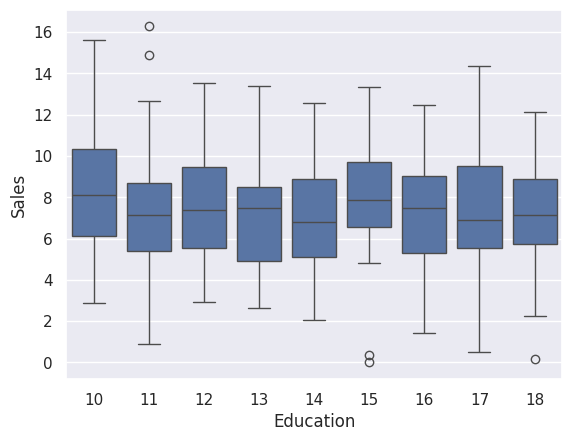

In [ ]:
# Predictores vs variable target, análisis individual para Education
sns.set()
%matplotlib inline
sns.boxplot(x="Education", y="Sales", data=datos)

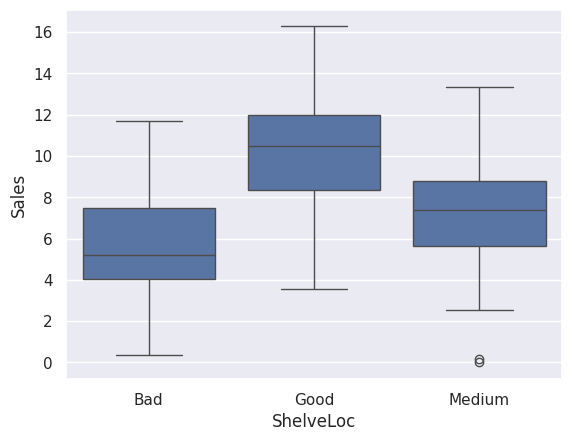

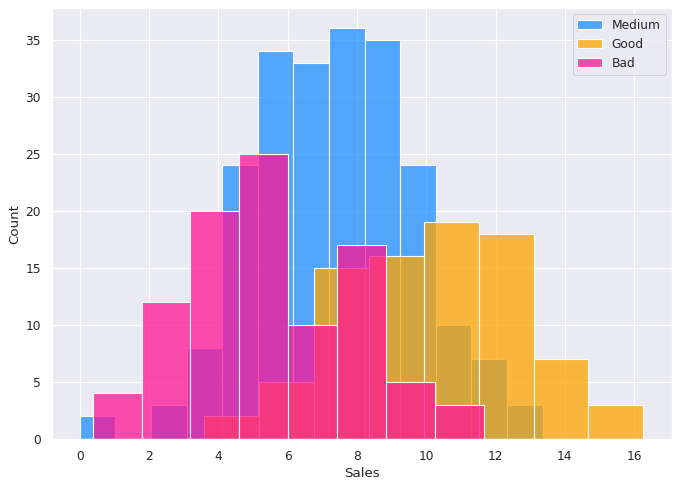

In [ ]:
# Predictores vs variable target, análisis individual para ShelveLoc
sns.boxplot(x="ShelveLoc", y="Sales", data=datos)
plt.figure(figsize=(10,7), dpi= 80)
sns.histplot(datos['Sales'].loc[datos['ShelveLoc'] == 'Medium'], color="dodgerblue", label="Medium")
sns.histplot(datos['Sales'].loc[datos['ShelveLoc'] == 'Good'], color="orange", label="Good")
sns.histplot(datos['Sales'].loc[datos['ShelveLoc'] == 'Bad'], color="deeppink", label="Bad")
plt.legend()

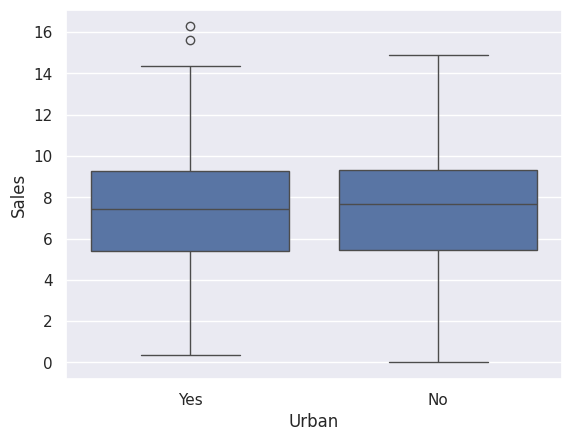

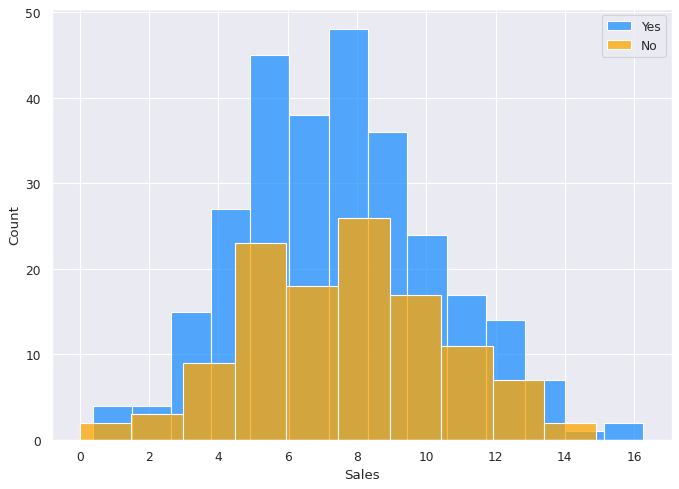

In [ ]:
# Predictores vs variable target, análisis individual para Urban
sns.boxplot(x="Urban", y="Sales", data=datos)
plt.figure(figsize=(10,7), dpi= 80)
sns.histplot(datos['Sales'].loc[datos['Urban'] == 'Yes'], color="dodgerblue", label="Yes")
sns.histplot(datos['Sales'].loc[datos['Urban'] == 'No'], color="orange", label="No")
plt.legend()

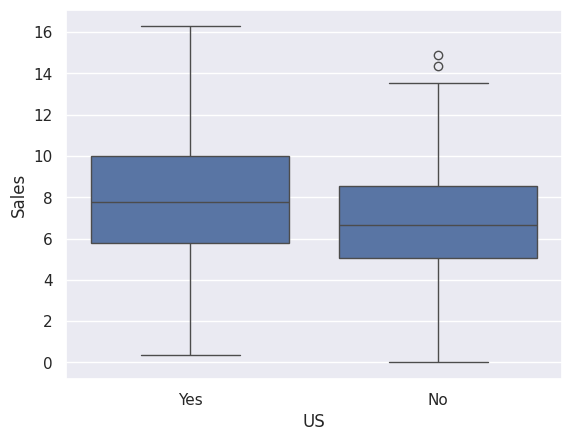

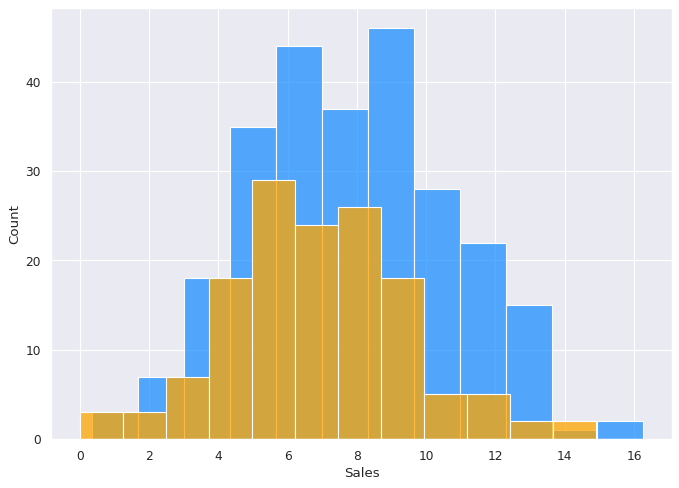

In [ ]:
# Predictores vs variable target, análisis individual para US
sns.boxplot(x="US", y="Sales", data=datos)
plt.figure(figsize=(10,7), dpi= 80)
sns.histplot(datos['Sales'].loc[datos['US'] == 'Yes'], color="dodgerblue", label="Yes")
sns.histplot(datos['Sales'].loc[datos['US'] == 'No'], color="orange", label="No")
plt.show()

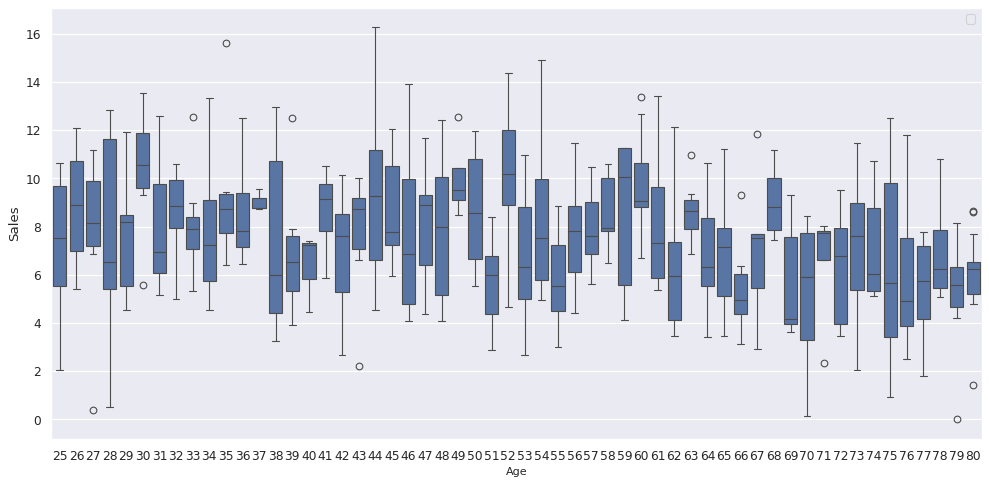

In [ ]:
# Predictores vs variable target, análisis individual para Age
plt.figure(figsize=(15,7), dpi= 80)
sns.boxplot(x="Age", y="Sales", data=datos)
plt.xlabel('Age', fontsize=10)  # Modificación del tamaño del texto en el eje x
sns.histplot(datos['Sales'].loc[datos['Age'] == 'Yes'], color="dodgerblue", label="Yes")
sns.histplot(datos['Sales'].loc[datos['Age'] == 'No'], color="orange", label="No")
plt.legend()
plt.show()

Del análisis anterior vemos que "**ShelveLoc**" está relacionado con las ventas ya que la distribución (media, máxima, mínima) de las ventas es diferente según la categoría de Shelveloc. **Urban** "sí" o **Urban** "no" no importa para Ventas. "**US**" está ligeramente relacionado con las ventas, ya que, las tiendas en "US" muestran ventas un poco más altas que otras. La media de ventas muestra algunas diferencias por niveles de educación.  

También del scatterplot mostrado arriba entre **Sales** y **Price** vemos una alta correlación negativa.

La edad ("Age") parece ser importante en el modelo, ya que, a menor edad de la población se observa un mayor número de ventas promedio.

In [ ]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####
# Aplicar Label Encoder a las variables categóricas
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
datos['ShelveLoc_enc'] = label_encoder.fit_transform(datos['ShelveLoc'])
datos['Urban_enc'] = label_encoder.fit_transform(datos['Urban'])
datos['US_enc'] = label_encoder.fit_transform(datos['US'])
datos['Education_enc'] = label_encoder.fit_transform(datos['Education'])

# Seleccionar variables predictoras y variable objetivo
predictors = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'ShelveLoc_enc', 'Urban_enc', 'US_enc', 'Education_enc']
X = datos[predictors]
y = datos['Sales']

In [ ]:
X.head()

,CompPrice,Income,Advertising,Population,Price,Age,ShelveLoc_enc,Urban_enc,US_enc,Education_enc
0,138,73,11,276,120,42,0,1,1,7
1,111,48,16,260,83,65,1,1,1,0
2,113,35,10,269,80,59,2,1,1,2
3,117,100,4,466,97,55,2,1,1,4
4,141,64,3,340,128,38,0,1,0,3


<Figure size 350x250 with 0 Axes>

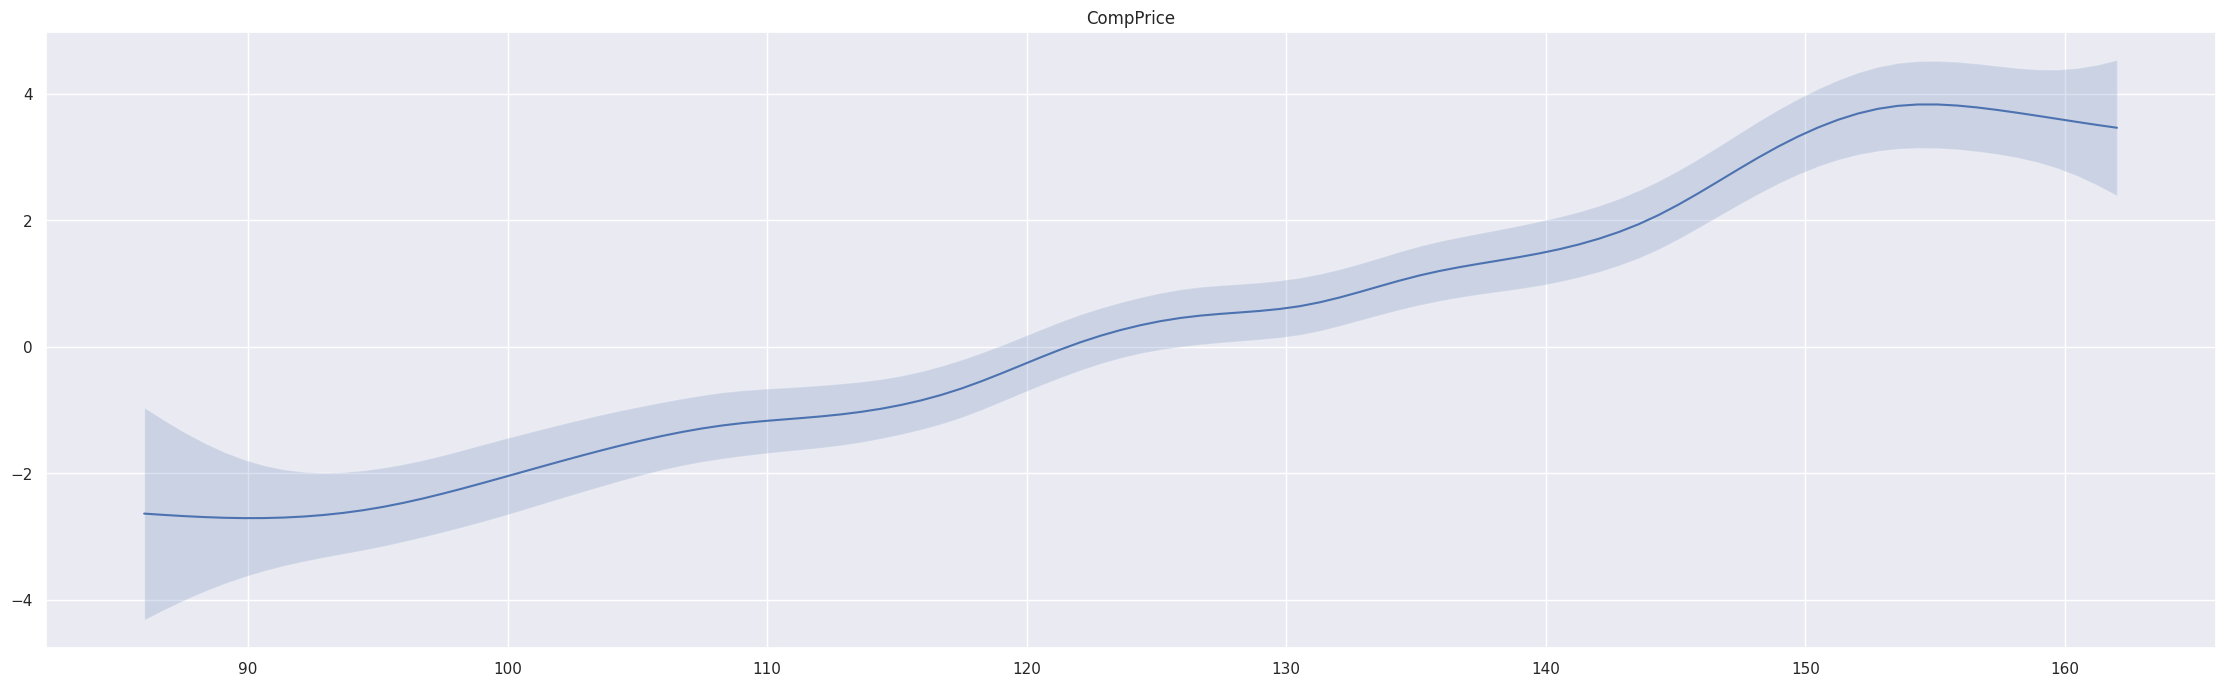

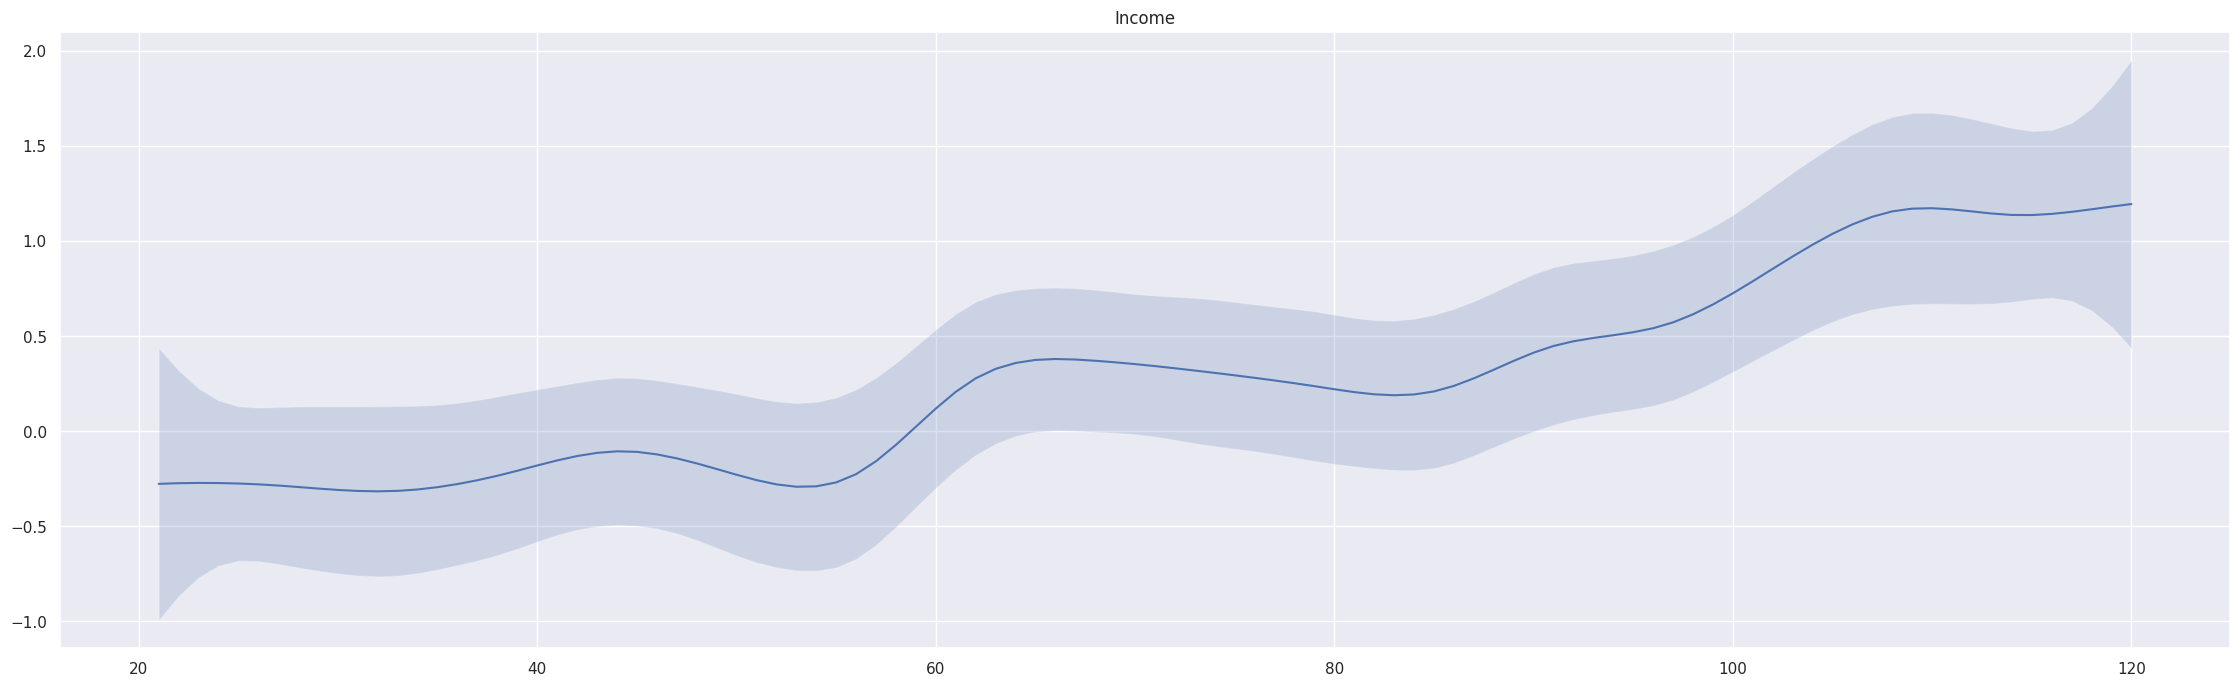

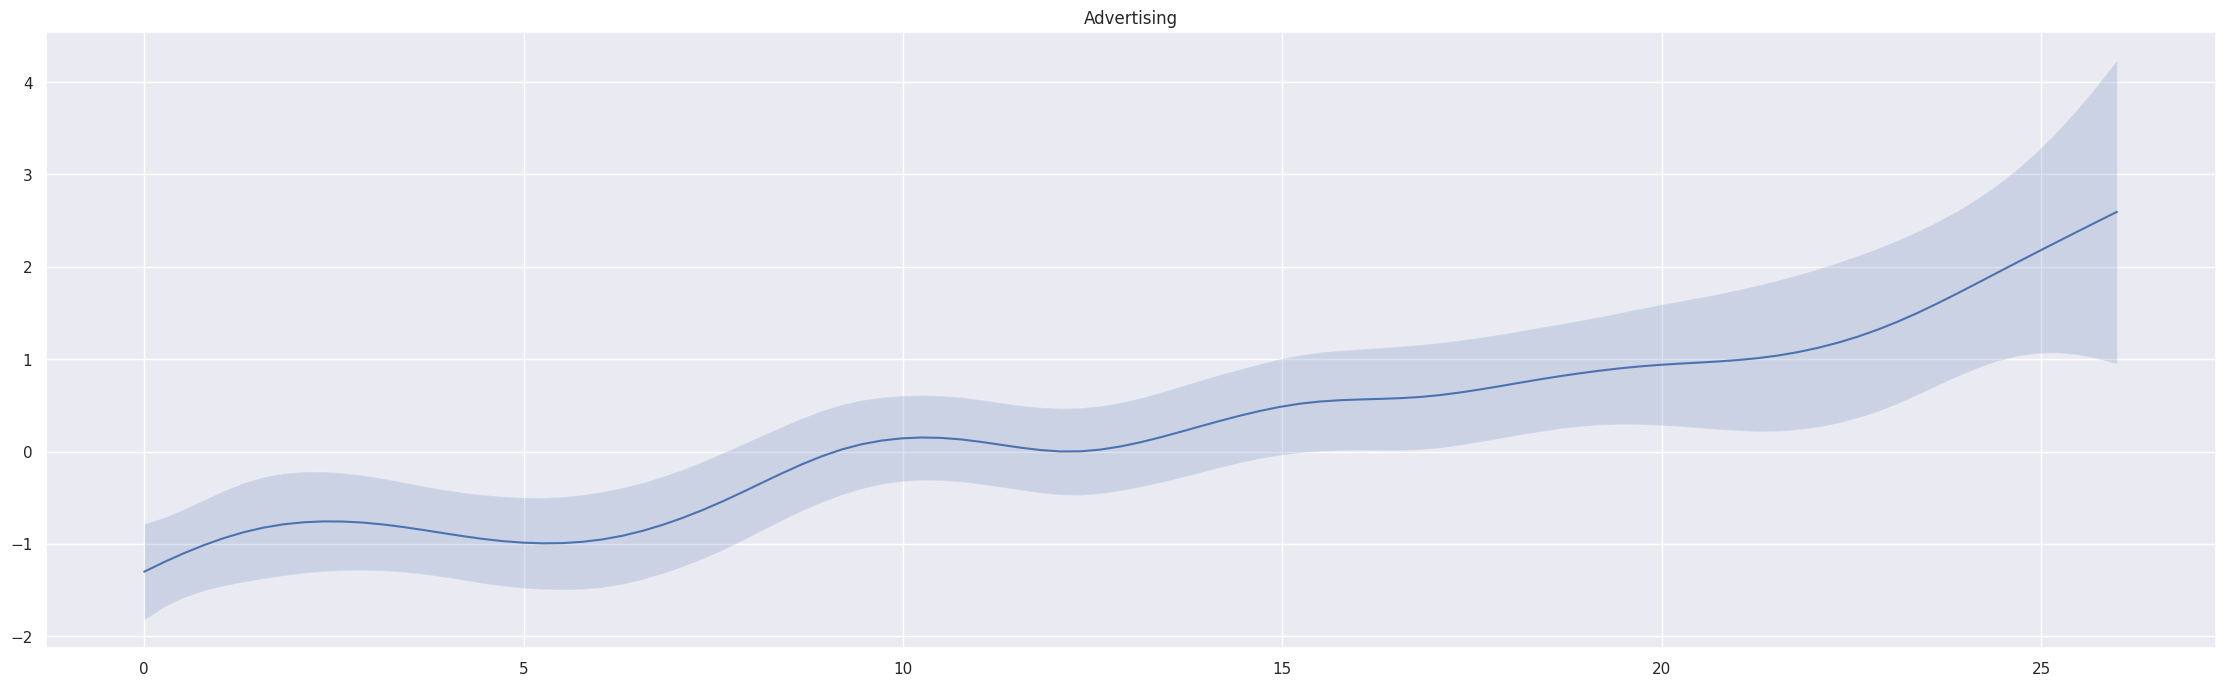

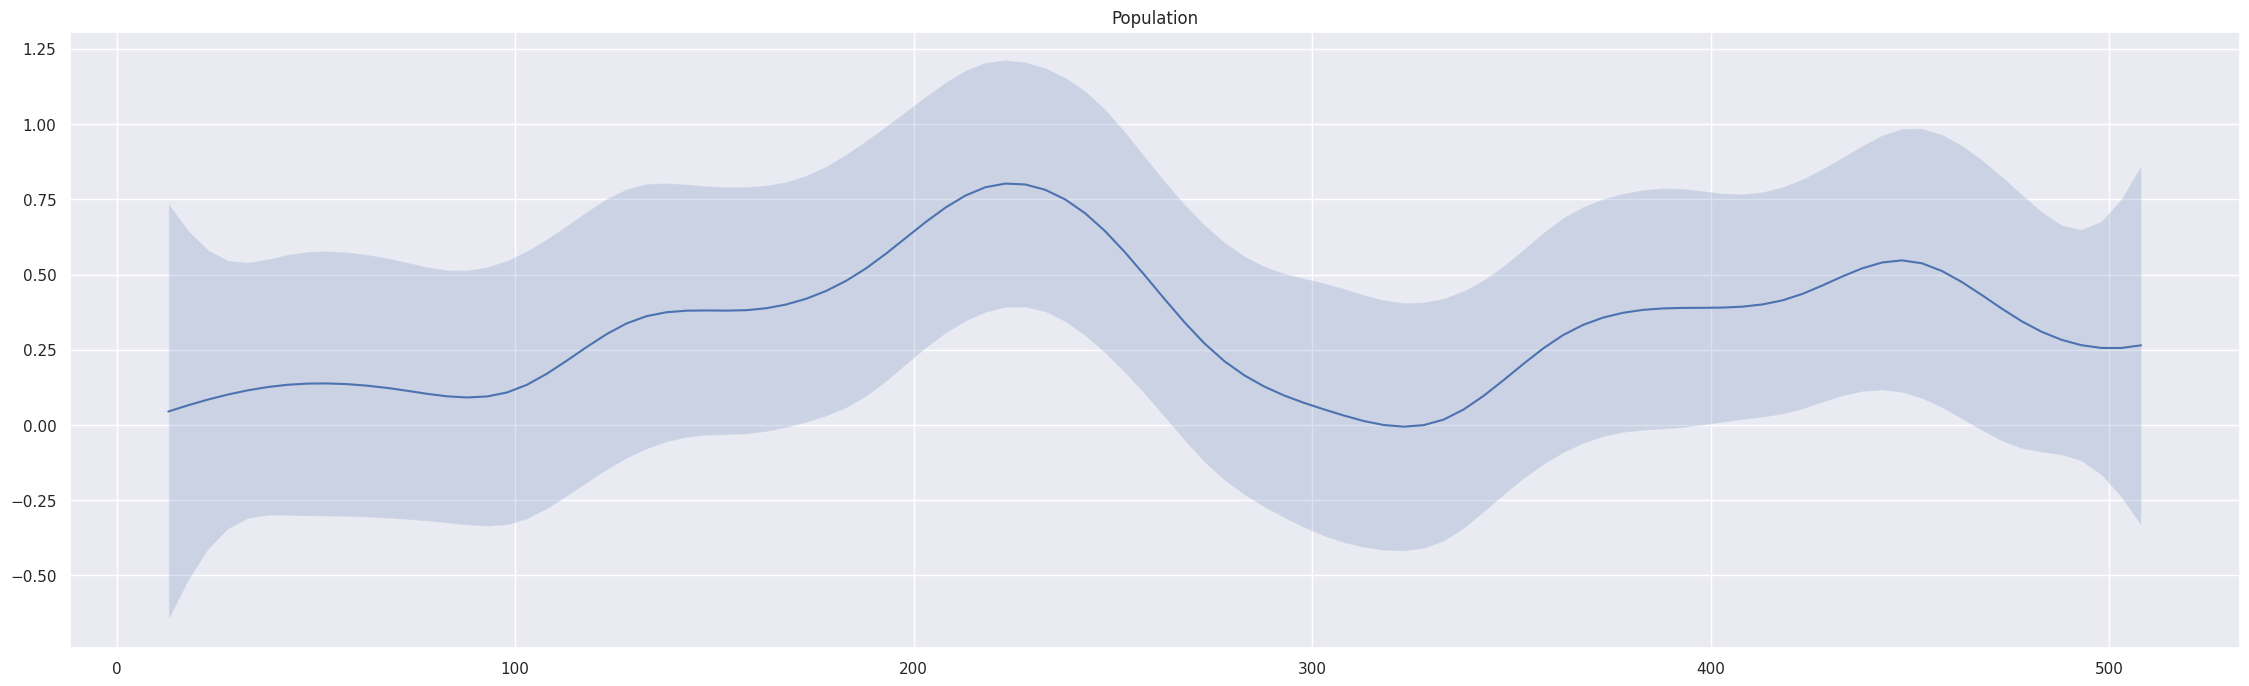

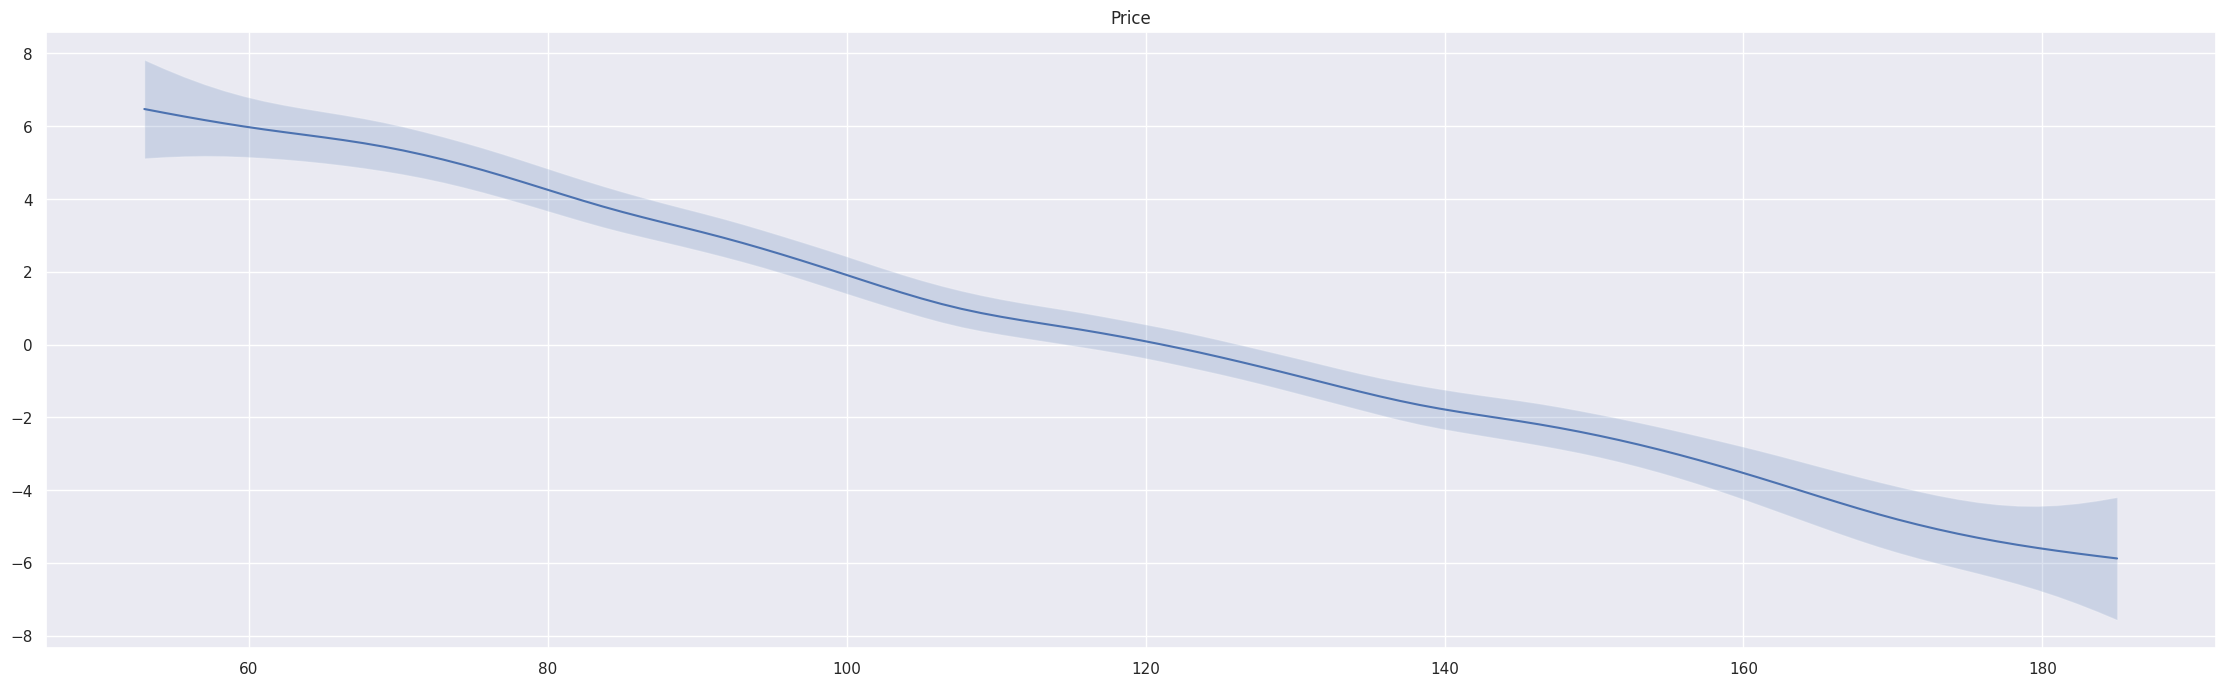

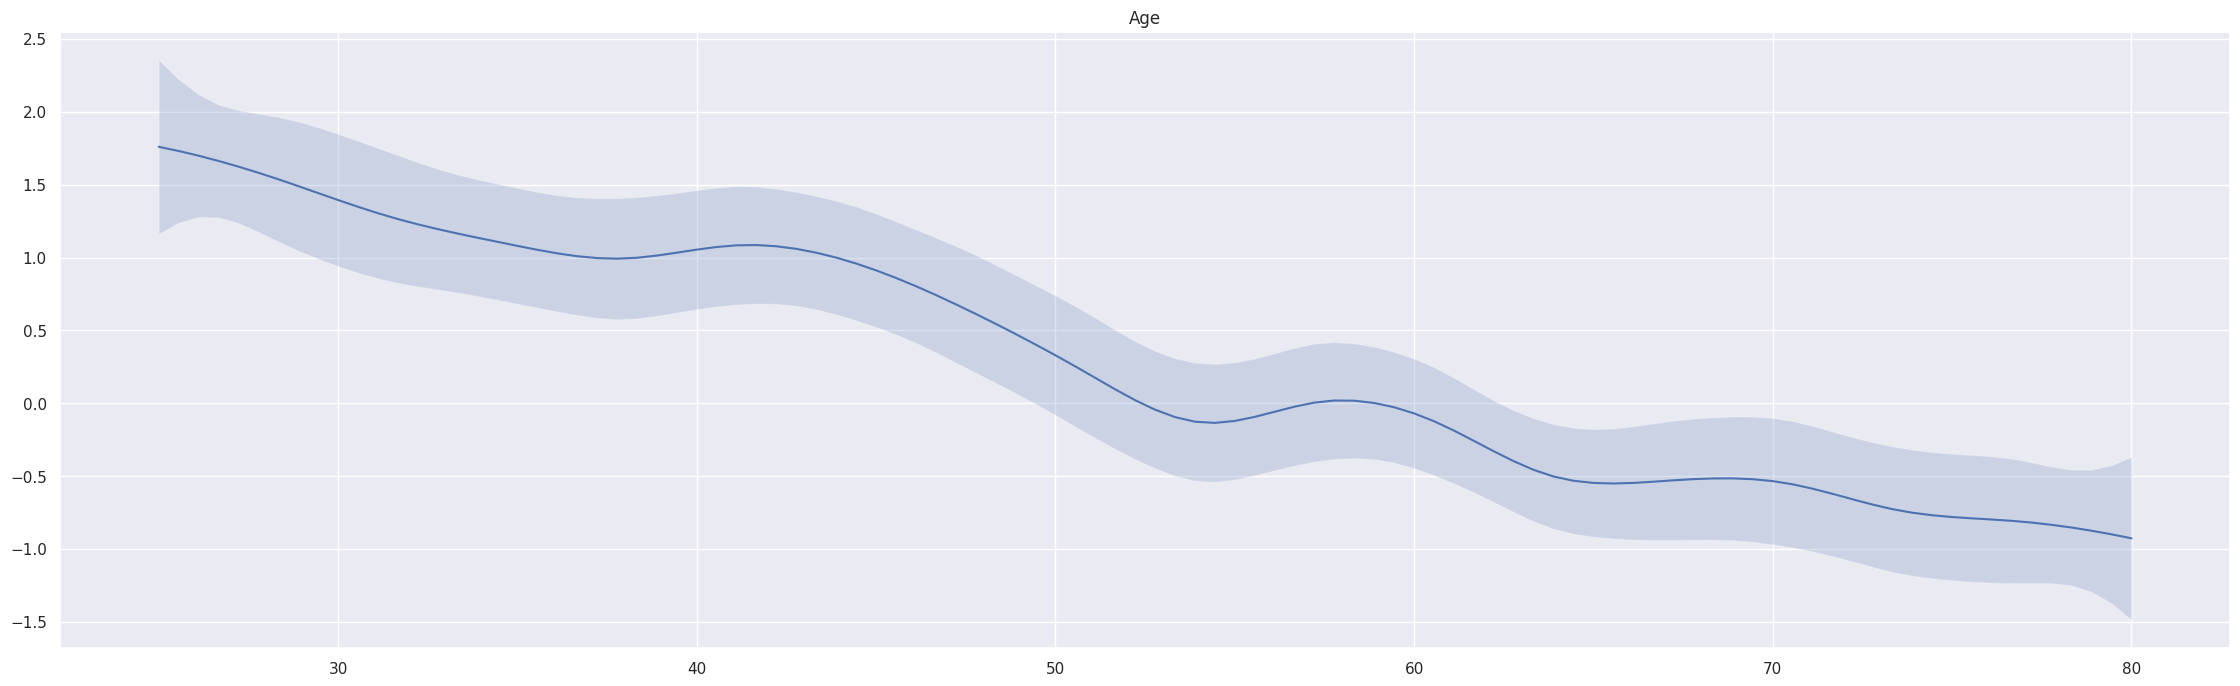

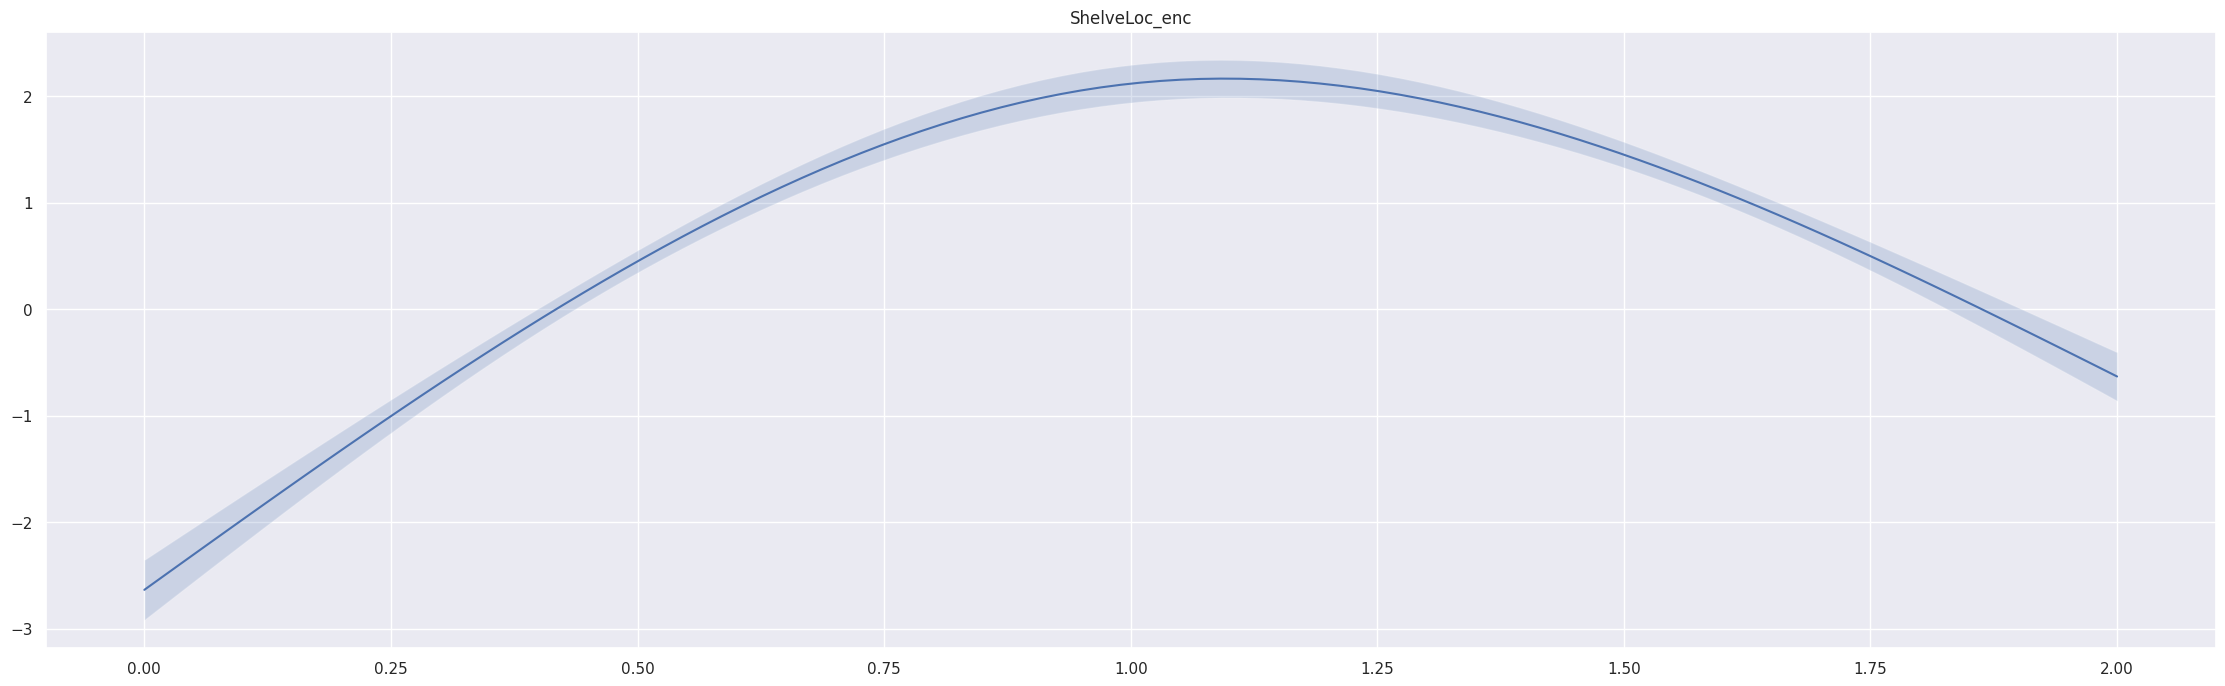

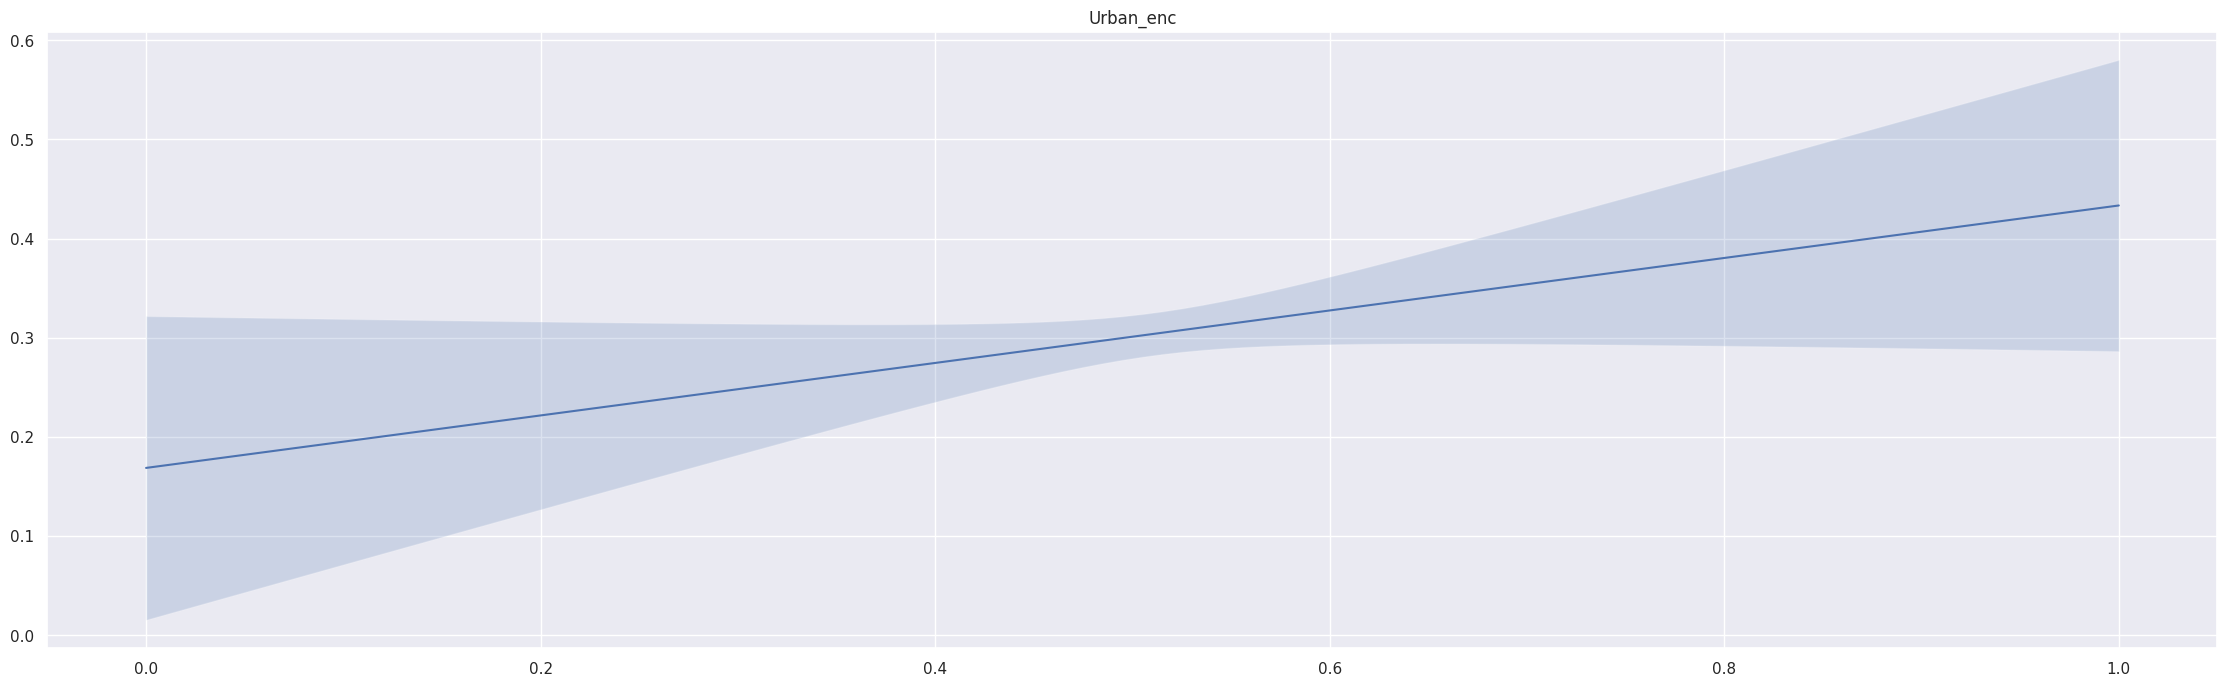

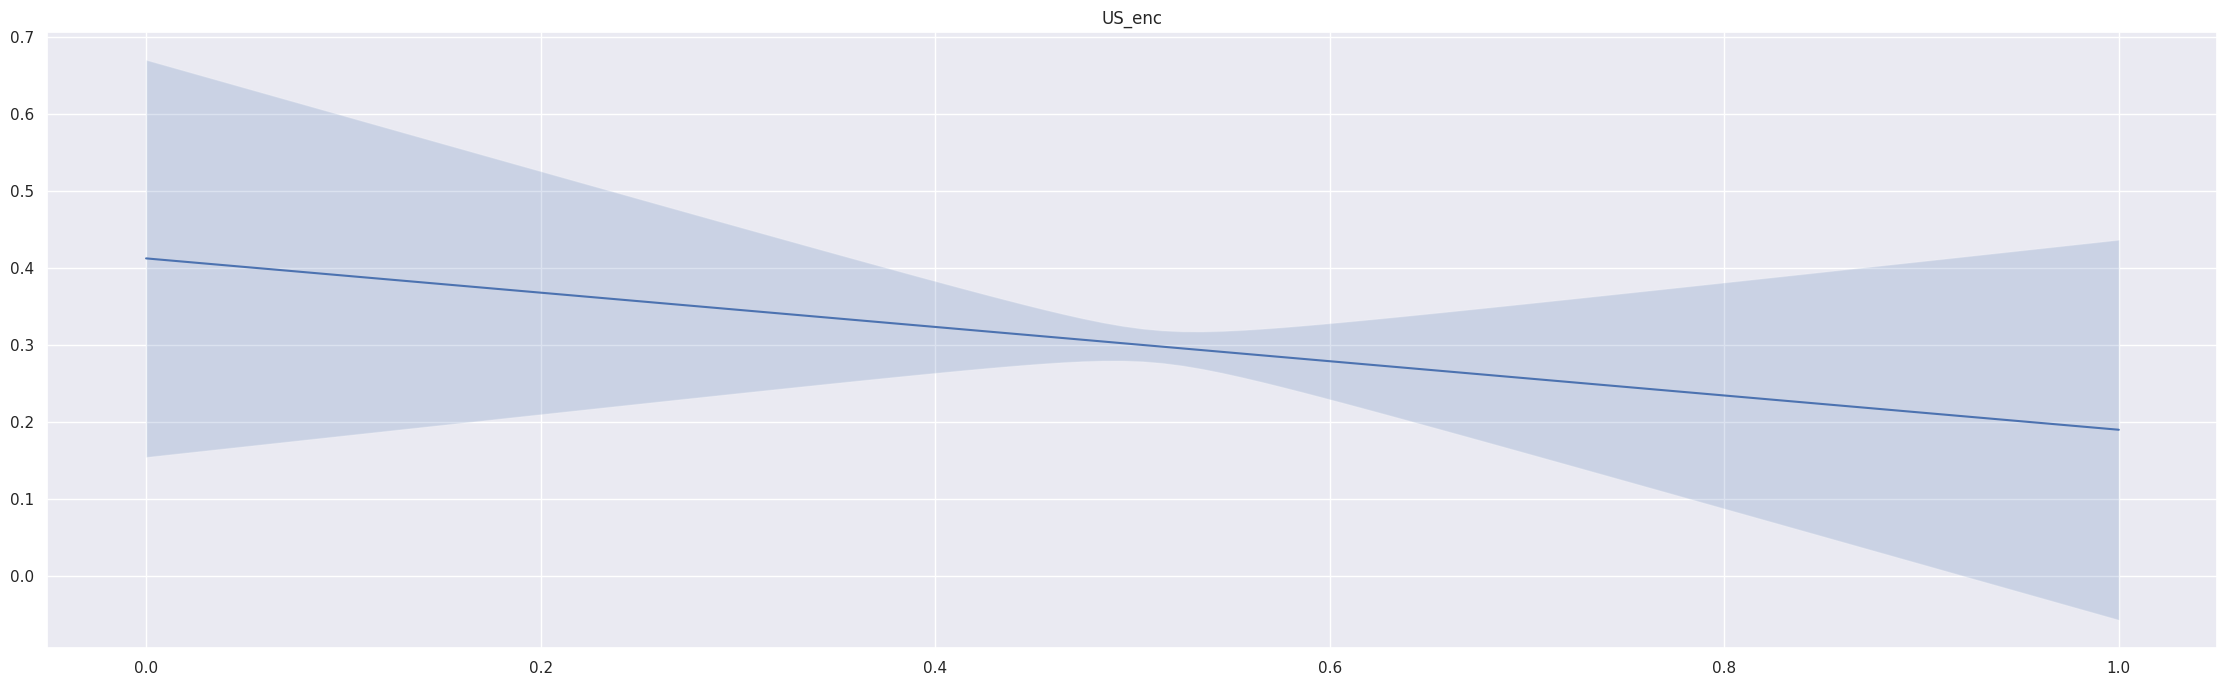

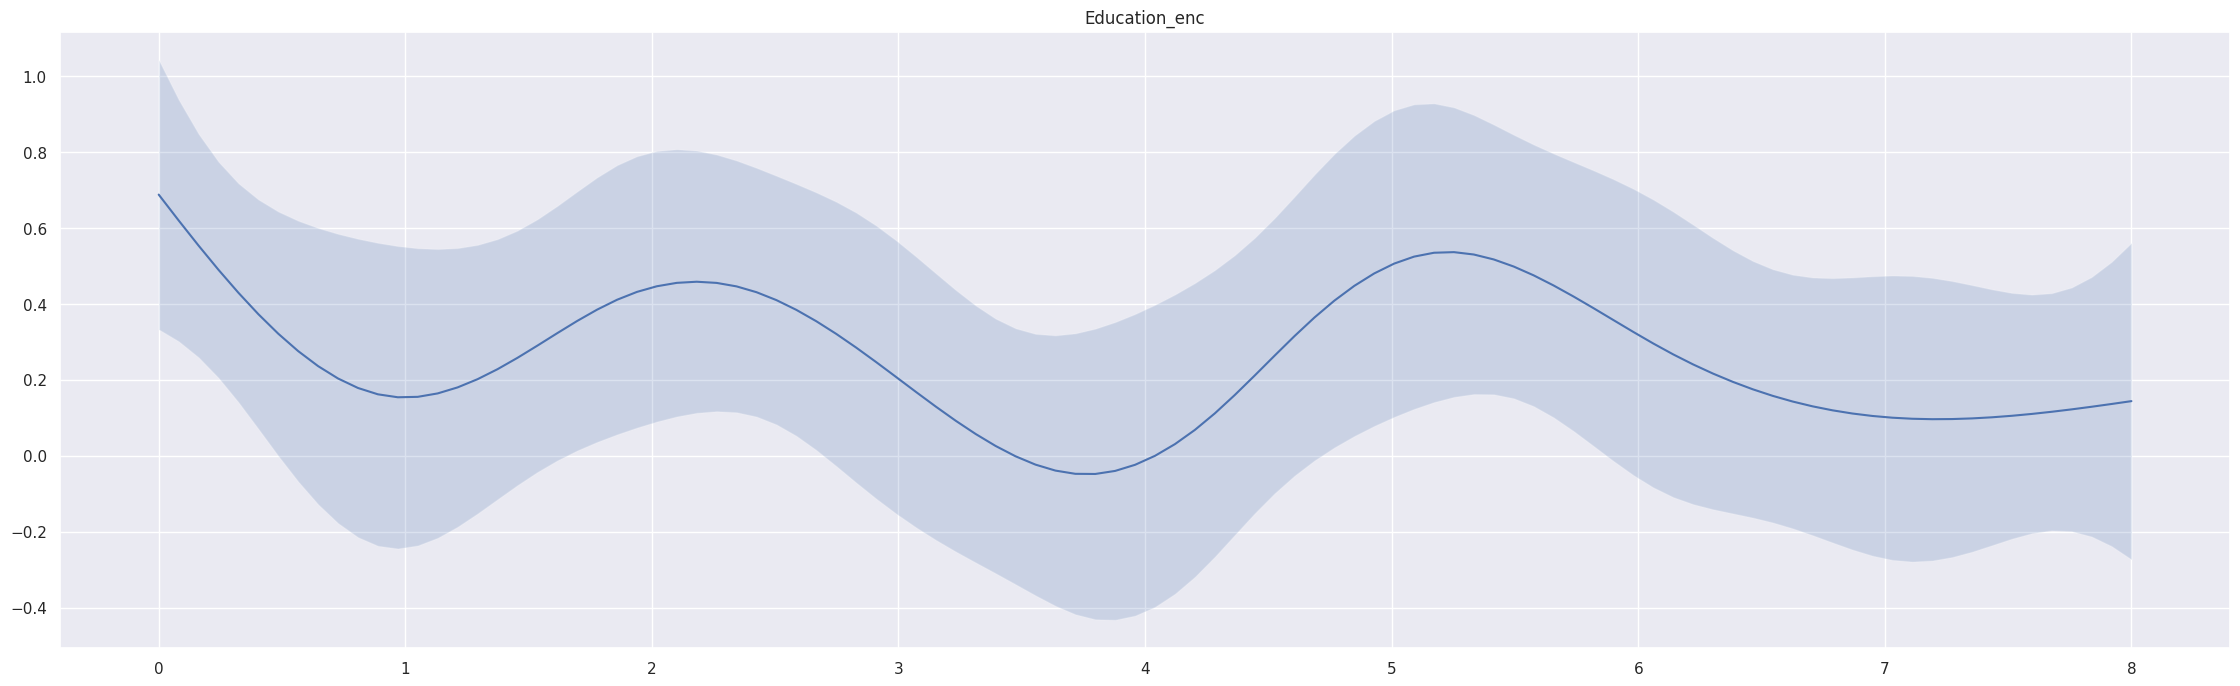

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=69069)

# Modelo GAM
gam = LinearGAM().fit(X_train, y_train)

# Efectos de las variables
plt.figure(figsize=(7,5), dpi= 50)
for i, term in enumerate(gam.terms):
    if term.isintercept:
        continue
    XX = gam.generate_X_grid(term=i)
    pdep, confi = gam.partial_dependence(term=i, X=XX, width=0.95)
    plt.figure()
    if XX.ndim == 1:
        XX = XX[:, None]
    plt.plot(XX[:, i % XX.shape[1]], pdep)
    plt.fill_between(XX[:, i % XX.shape[1]], confi[:, 0], confi[:, 1], alpha=0.2)
    plt.title(predictors[i])
    plt.show()

Las gráficas anteriores representan los efectos parciales de las variables individuales en el modelo para predecir la variable respuesta **Sales.** Cada gráfica muestra cómo cambia la relación entre la variable independiente y la dependiente después de ajustar por los efectos de todas las otras variables en el modelo. A continuación una breve descripción de los observado:

**Population:** La relación entre la población y las ventas **no es lineal** y muestra una variabilidad considerable a lo largo del rango de la población. Hay picos y valles indicando que ciertos tamaños de población están asociados con aumentos o disminuciones en las ventas. La banda sombreada alrededor de la línea representa un intervalo de confianza, lo que indica que la relación es estadísticamente significativa en algunos puntos pero no en otros.  

**Income:** Similar a la población, el ingreso presenta una **relación no lineal** con las ventas. Se observan varias fluctuaciones que sugieren que ciertos niveles de ingreso están relacionados con cambios en las ventas. Nuevamente, el intervalo de confianza sugiere que algunos de estos efectos son más claramente definidos que otros.  

**ShelveLoc_enc:** La relación parece ser más o menos lineal y monotónica, lo que sugiere que a medida que se incrementa la codificación de esta variable (probablemente de malo a bueno), las ventas también tienden a aumentar.  

**Urban_enc:** Esta variable categórica codifica si la tienda está en un área urbana. La línea sugiere una relación positiva y **más o menos lineal**: las tiendas en áreas urbanas podrían estar asociadas con mayores ventas en comparación con las que no están en áreas urbanas.  

**US_enc:** Otra variable categórica que codifica si la tienda está en los EE. UU. o no. La tendencia ascendente sugiere que las tiendas en los EE. UU. tienden a tener mayores ventas que las tiendas fuera de los EE. UU.  

**Education_enc:** La relación entre la codificación de la educación y las ventas parece ser no lineal, con varios picos y valles. Esto podría indicar que diferentes niveles de educación (probablemente codificados de bajo a alto) tienen diferentes efectos en las ventas, con algunas categorías mostrando una relación positiva y otras una negativa.  

In [ ]:
lam = np.array([.2, 1])  # Selección de valores de lambda por variable
lams = [lam] * 10

# La siguiente función calibra el modelo para los prámetros lambda.
gam.gridsearch(X_train, y_train, lam=lams) # Precaución: Puede tomar mucho tiempo

100% (1024 of 1024) |####################| Elapsed Time: 0:04:35 Time:  0:04:35


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + intercept,
   tol=0.0001, verbose=False)

In [ ]:
# Modelo GAM Full
# predictors = ['CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'ShelveLoc_enc', 'Urban_enc', 'US_enc', 'Education_enc']
# s(0): Se refiere a CompPrice
# s(1): Se refiere a Income
# s(2): Se refiere a Advertising
# s(3): Se refiere a Population
# s(4): Se refiere a Price
# s(5): Se refiere a Age
# s(6): Se refiere a ShelveLoc_enc
# s(7): Se refiere a Urban_enc
# s(8): Se refiere a US_enc
# s(9): Se refiere a Education_enc
# Se ajusta spline para todas las variables. Factores (f()) no son usados ya que fueron tratadas con encoder.
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9)).fit(X_train, y_train)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     72.3481
Link Function:                     IdentityLink Log Likelihood:                                  -350.3515
Number of Samples:                          268 AIC:                                              847.3992
                                                AICc:                                             903.7199
                                                GCV:                                                1.9565
                                                Scale:                                               1.037
                                                Pseudo R-Squared:                                   0.8994
Feature Function                  Lam

<ipython-input-87-643b812251b0>:15: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [ ]:
# Modelo Final
gam = LinearGAM(s(0) + s(1) + s(2) + s(4) + s(5) + s(6)).fit(X_train, y_train)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     53.2539
Link Function:                     IdentityLink Log Likelihood:                                  -362.5157
Number of Samples:                          268 AIC:                                              833.5391
                                                AICc:                                             861.7204
                                                GCV:                                                1.6237
                                                Scale:                                              1.0557
                                                Pseudo R-Squared:                                   0.8876
Feature Function                  Lam

<ipython-input-88-3c533e1af0d0>:3: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  gam.summary()


In [ ]:
# Evaluación
print('Score en el conjunto de entrenamiento:', gam.score(X_train, y_train))
print('Score en el conjunto de prueba:', gam.score(X_test, y_test))

Score en el conjunto de entrenamiento: 0.8875963973867692
Score en el conjunto de prueba: 0.8519485084437388


In [ ]:
# Predicciones en el conjunto de prueba
y_pred = gam.predict(X_test)

# Cálculo del Error Cuadrático Medio (MSE) y el coeficiente de determinación R^2
mseGAM = mean_squared_error(y_test, y_pred)
r2GAM = r2_score(y_test, y_pred)

print(f"MSE GAM: {mseGAM}")
print(f"R^2 GAM: {r2GAM}")

MSE GAM: 1.2995191835223279
R^2 GAM: 0.8519485084437388


**Metodología:**
*Preparación de Datos:* Las variables categóricas (ShelveLoc, Urban, US, Education) se transforman en valores numéricos mediante el uso de LabelEncoder. Esta codificación transforma las categorías en valores enteros, permitiendo su uso en modelos matemáticos que requieren entradas numéricas.

*Selección de Variables:* Se eligen las variables Price, Population, Income, y las variables categóricas codificadas (ShelveLoc_enc, Urban_enc, US_enc, Education_enc) como predictores para el modelo. La variable Sales se utiliza como variable objetivo.

*División de Datos:* El conjunto de datos se divide en conjuntos de entrenamiento (X_train, y_train) y prueba (X_test, y_test), utilizando una proporción de 67% para entrenamiento y 33% para prueba, asegurando así una distribución representativa de los datos para ambos propósitos.

*Modelado Inicial:* Se entrena un modelo GAM inicial con todas las variables seleccionadas para explorar el efecto de cada una en la variable objetivo. Este análisis preliminar incluye la visualización de los efectos parciales de las variables sobre Sales, lo que ayuda a entender sus relaciones no lineales y complejas.

*Optimización de Modelos:* Se realiza una búsqueda de cuadrícula (gridsearch) para optimizar los parámetros de suavizado (lambda) del modelo, con el objetivo de encontrar una configuración que mejore el rendimiento del modelo.

*Modelo Final y Evaluación:* Con base en la selección de variables y la optimización de lambda, se ajusta un modelo GAM final y se evalúa su rendimiento en el conjunto de entrenamiento y de prueba. Se utilizan métricas como el score de predicción y el coeficiente de determinación $R^2$, además del Error Cuadrático Medio (MSE), para medir la calidad del ajuste y la capacidad predictiva del modelo.

*Predicción y Evaluación Final:* Finalmente, se generan predicciones para el conjunto de prueba y se calculan el MSE y $R^2$ para estas predicciones.

**Comentarios Finales modelo GAM:**
El modelo utiliza solo 6 predictores, con un valor de 0.85, muestra que aproximadamente el 85% de la variabilidad en las ventas es explicada por el modelo GAM. El MSE es calculado en 1.30. El valor de lambda (λ) fue optimizado en 0.6 para todas los predictores, los cual se considera un valor intermedio, se trató de buscar un equilibrio entre seguir de cerca los datos y evitar el sobreajuste (overfitting). Lo anterior significa que todas las variables en el modelo están sujetas a un nivel similar de suavizado. Probablemente modelos más eficientes requerirán que diferentes variables podrían beneficiarse de diferentes valores de λ para reflejar sus distintas relaciones y niveles de variabilidad con respecto a la variable de respuesta (Sales, en este caso). Con este modelo se corrobora que las variables Price y Population no son significativas en el modelo.

**4c.** Para probar la hipótesis de que las variables "Price" y "Population" no deben ser incluidas en el modelo, realizaremos un test F para comparar la varianza explicada por el modelo completo con un modelo reducido que no incluya estas variables.  

In [ ]:
# Prueba de Hipotesis para Price & Population
# s(0): Se refiere a CompPrice
# s(1): Se refiere a Income
# s(2): Se refiere a Advertising
# s(3): Se refiere a Population
# s(4): Se refiere a Price
# s(5): Se refiere a Age
# s(6): Se refiere a ShelveLoc_enc
# s(7): Se refiere a Urban_enc
# s(8): Se refiere a US_enc
# s(9): Se refiere a Education_enc

# Ajustar el modelo completo con todas las variables
gam_full = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9)).fit(X_train, y_train)

# Ajustar el modelo reducido sin 'Price' y 'Population'
gam_reduced = LinearGAM(s(0) + s(1) + s(2) + s(5) + s(6) + s(7) + s(8) + s(9)).fit(X_train, y_train)

# Calcular la devianza explicada por cada modelo
full_deviance = gam_full.deviance_residuals(X_train, y_train).sum()
reduced_deviance = gam_reduced.deviance_residuals(X_train, y_train).sum()

# Calcular los grados de libertad de cada modelo
full_df = gam_full.statistics_['edof']
reduced_df = gam_reduced.statistics_['edof']

# Calcular la estadística F y el p-valor asociado
F = ((reduced_deviance - full_deviance) / (full_df - reduced_df)) / (full_deviance / (len(y) - full_df))
p_value = chi2.sf(F, full_df - reduced_df)

print(f'F-statistic: {F}, p-value: {p_value}')

F-statistic: 1.6633257055602646, p-value: 0.99999993187118


Un p-value menor que 0.05 en esta prueba indicaría que el modelo completo con las variables adicionales es significativamente mejor que el modelo reducido, lo que sugiere que esas variables deben ser incluidas en el modelo. En este caso se obtiene un p-value de 0.999, indicando que esas variables deben ser excluidas del modelo.  

**4d.** Prueben la teoría que afirma que el efecto de la variable "Income" debe ser lineal. Para esto vamos a realizar una comparación entre un modelo GAM que modela "Income" con una función suavizante (es decir, no lineal) y un modelo lineal general (GLM) que asume que la relación entre "Income" y la variable de respuesta es lineal. La idea es ver si el modelo GAM con un término suavizado para "Income" proporciona un mejor ajuste al modelo que un modelo lineal simple.

In [ ]:
# Verificación Income Lineal
# s(0): Se refiere a CompPrice
# s(1): Se refiere a Income
# s(2): Se refiere a Advertising
# s(3): Se refiere a Population
# s(4): Se refiere a Price
# s(5): Se refiere a Age
# s(6): Se refiere a ShelveLoc_enc
# s(7): Se refiere a Urban_enc
# s(8): Se refiere a US_enc
# s(9): Se refiere a Education_enc

# Ajustar un modelo lineal para 'Income'
gam_incomeLin = LinearGAM(s(0) + l(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9)).fit(X_train, y_train)

# Ajustar un modelo GAM con una función suavizada para 'Income'
gam_incomeSmo = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9)).fit(X_train, y_train)

# Calcular AIC para ambos modelos
lin_reg_aic = gam_incomeLin.statistics_['AIC']
gam_aic = gam_incomeSmo.statistics_['AIC']

# Imprimir los valores de AIC para comparar los modelos
print(f'Linear Model AIC: {lin_reg_aic}')
print(f'GAM with Smoothed Income AIC: {gam_aic}')

Linear Model AIC: 837.1632615130465
GAM with Smoothed Income AIC: 847.3992482913276


Dado que el AIC del modelo lineal es significativamente más bajo (837.16), versus 847.40 (suavizado), esto sugiere que no hay suficiente evidencia en los datos para preferir el modelo más complejo con el efecto no lineal de "Income" sobre el modelo lineal. En otras palabras, la variable "Income" podría ser adecuadamente modelada como una relación lineal con la variable de respuesta en este contexto particular.

### 5. Concluir sobre la capacidad predictiva de los modelos (10 puntos)
¿Cuál modelo de los estimados en los apartados 2, 3.a y 4.a resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

(Utilicen este espacio para escribir su análisis y conclusiones sobre el punto 5)